# 0e - Estimate the area and volume response timescale for every glacier model and experiment (for the NON-SHIFTED simulations)

- response timescale estimated at mass/area shrinkage rates of -50%, -80% and -90%. The response timescales is only computed if at least 25% of the mass/area is lost (otherwise the noise is too large)...

The following file is created, which is later used in other notebooks for the analysis and visualisations:
`'../PartB_data/resp_time_non_shifted_for_deltaT_rgi_reg_roll_volume_area_21yravg.csv'`

(very similar to http://localhost:7269/lab/tree/www_lschuster/GlacierMIP3/0_pre_post_processing/0e_response_timescale_estimates.ipynb, but here for the non-shifted, and for both volume and area!!!)

In [2]:

DATE = 'Feb12_2024' 
fill_option = 'repeat_last_101yrs'

import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

approach = '_via_5yravg'


path_merged_runs_scaled_extend = f'../data/GMIP3_reg_glacier_model_data/glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled_extended_{fill_option}.nc'
ds_reg_models_extend = xr.open_dataset(path_merged_runs_scaled_extend)

# only select final submission data
glac_models = ['CISM2', 'GO', 'PyGEM-OGGM_v13', 'GloGEMflow', 'Kraaijenbrink',
               'GLIMB','OGGM_v16', 'GloGEMflow3D', 'OGGM-VAS']
ds_reg_models_extend = ds_reg_models_extend.sel(model_author = glac_models)


pd_avg_exps= pd.read_csv('../data/climate_input_data/temp_ch_ipcc_ar6_isimip3b.csv', index_col=[0])
pd_global_temp_exp_m = pd_avg_exps.set_index(['gcm', 'period_scenario'])

In [362]:
from help_functions import pal_models, model_order, d_reg_num_name, model_order_anonymous,get_glob_temp_exp
pd_global_temp_exp = pd.read_csv('../data/climate_input_data/temp_ch_ipcc_ar6_isimip3b.csv', index_col = 0)

hue_order_anonymous = []

pal_models_l = []
hue_order = []
for m, p in zip(model_order, pal_models):
    if (m!='OGGM_v153') and (m!='Huss') and (m!='OGGM-VAS'):
        hue_order.append(m)
        pal_models_l.append(p)
for m in hue_order:
    hue_order_anonymous.append(model_order_anonymous[m])
pal_models = pal_models_l

print(hue_order, hue_order_anonymous)
# select the right models:
pal_models = sns.color_palette(pal_models)

dict_model_col = {}
for c,m in zip(pal_models, hue_order):
    dict_model_col[m] = c
    
# select the right models

glac_models = hue_order

['PyGEM-OGGM_v13', 'GloGEMflow', 'GloGEMflow3D', 'OGGM_v16', 'GLIMB', 'Kraaijenbrink', 'GO', 'CISM2'] ['model 1', 'model 2', 'model 3', 'model 4', 'model 5', 'model 6', 'model 7', 'model 8']


### Before looking into the response timescale differences, let's first check the steady-state differences... 

Text(0, -25, 'More relative remaining Mass than Area')

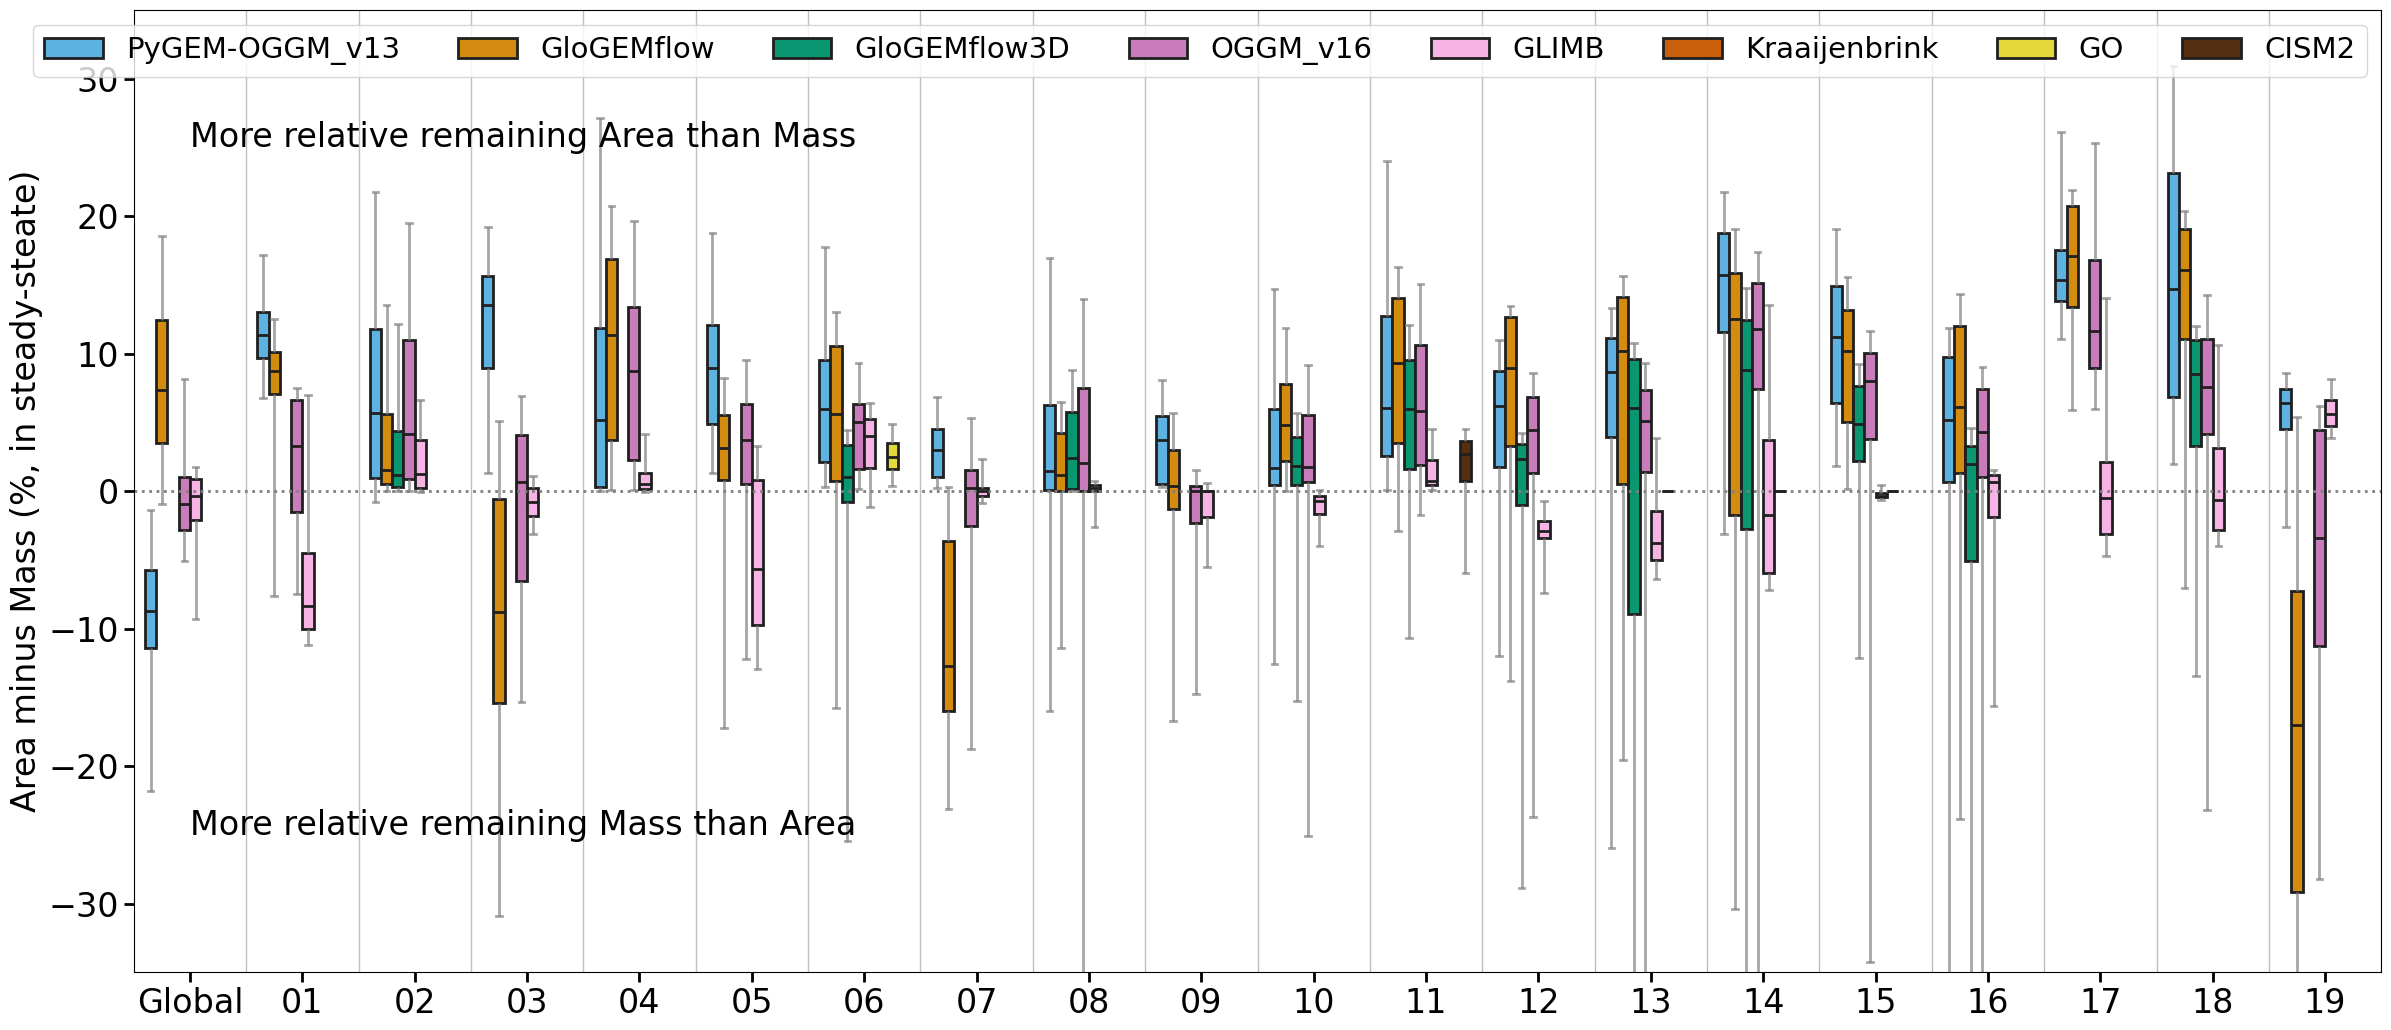

In [383]:
steady_state = 100*ds_reg_models_extend.sel(simulation_year=slice(4900,5000)).mean(dim='simulation_year')/ds_reg_models_extend.sel(simulation_year=0)
steady_state['rel_area_volume_diff_perc'] = steady_state.area_m2 - steady_state.volume_m3
steady_state = steady_state.to_dataframe().reset_index().dropna()

steady_state_glob = 100*ds_reg_models_extend.sum(dim='rgi_reg',
                                                 min_count=19).sel(simulation_year=slice(4900,5000)).mean(dim='simulation_year')/ds_reg_models_extend.sum(dim='rgi_reg',
                                                                                                                                                          min_count=19).sel(simulation_year=0)
steady_state_glob['rel_area_volume_diff_perc'] = steady_state_glob.volume_m3 - steady_state_glob.area_m2
steady_state_glob = steady_state_glob.to_dataframe().reset_index().dropna()
steady_state_glob['rgi_reg'] = 'Global'

steady_state = pd.concat([steady_state_glob, steady_state])
# Define custom sorting order
custom_order = ['Global'] + [f'{i:02}' for i in range(1, 20)]  # 'Global', '01', '02', ..., '12'
# Create a categorical type with the custom order
steady_state['rgi_reg'] = pd.Categorical(steady_state['rgi_reg'], categories=custom_order, ordered=True) 
# Sort the DataFrame by the 'rgi_reg' column
steady_state = steady_state.sort_values('rgi_reg').reset_index(drop=True)

plt.rc('font', size=24)  
plt.figure(figsize=(29,12.5)) #, sharey=True)
ax=plt.gca()
#fig, axs = plt.subplots(2,1,figsize=(29.5,25), sharey=True)
sns.boxplot(data=steady_state, x= 'rgi_reg', y='rel_area_volume_diff_perc', hue='model_author',
           fliersize=0, whis = [5,95], 
                          dodge = True, #hue='ssp',
                          #order = list(_sel_class1_sorted.rgi_reg_long.values), # order after -0.1 to 2.0°C 
                    #y = 'time', #hue_order = ['2040', '2100'],
                    linewidth=2,
                    capprops={'color':'grey', 'alpha':0.7},
                    whiskerprops={'color':'grey', 'alpha':0.7},
                    saturation = 0.9,
            #data=pd_vas, 
           hue_order=hue_order, palette=pal_models, ax=ax)
ax.axhline(0,lw=2,ls=':', color='grey')
ax.set_ylim([-35, 35])
ax.tick_params(axis='both', which='major', width=2, length=7)
ax.tick_params(axis='both', which='minor', width=1, length=5)
ax.set_xlabel('')
for vl in np.arange(0.5,20,1):
    ax.axvline(vl, color='grey', ls='-', alpha = 0.5, lw=1)
plt.ylabel('Area minus Mass (%, in steady-steate)')
plt.legend(ncol=8, fontsize=21)
plt.text(0, 25, 'More relative remaining Area than Mass')
plt.text(0, -25, 'More relative remaining Mass than Area')

**now after just roughly 100 years**

Text(0, -25, 'More relative remaining Mass than Area')

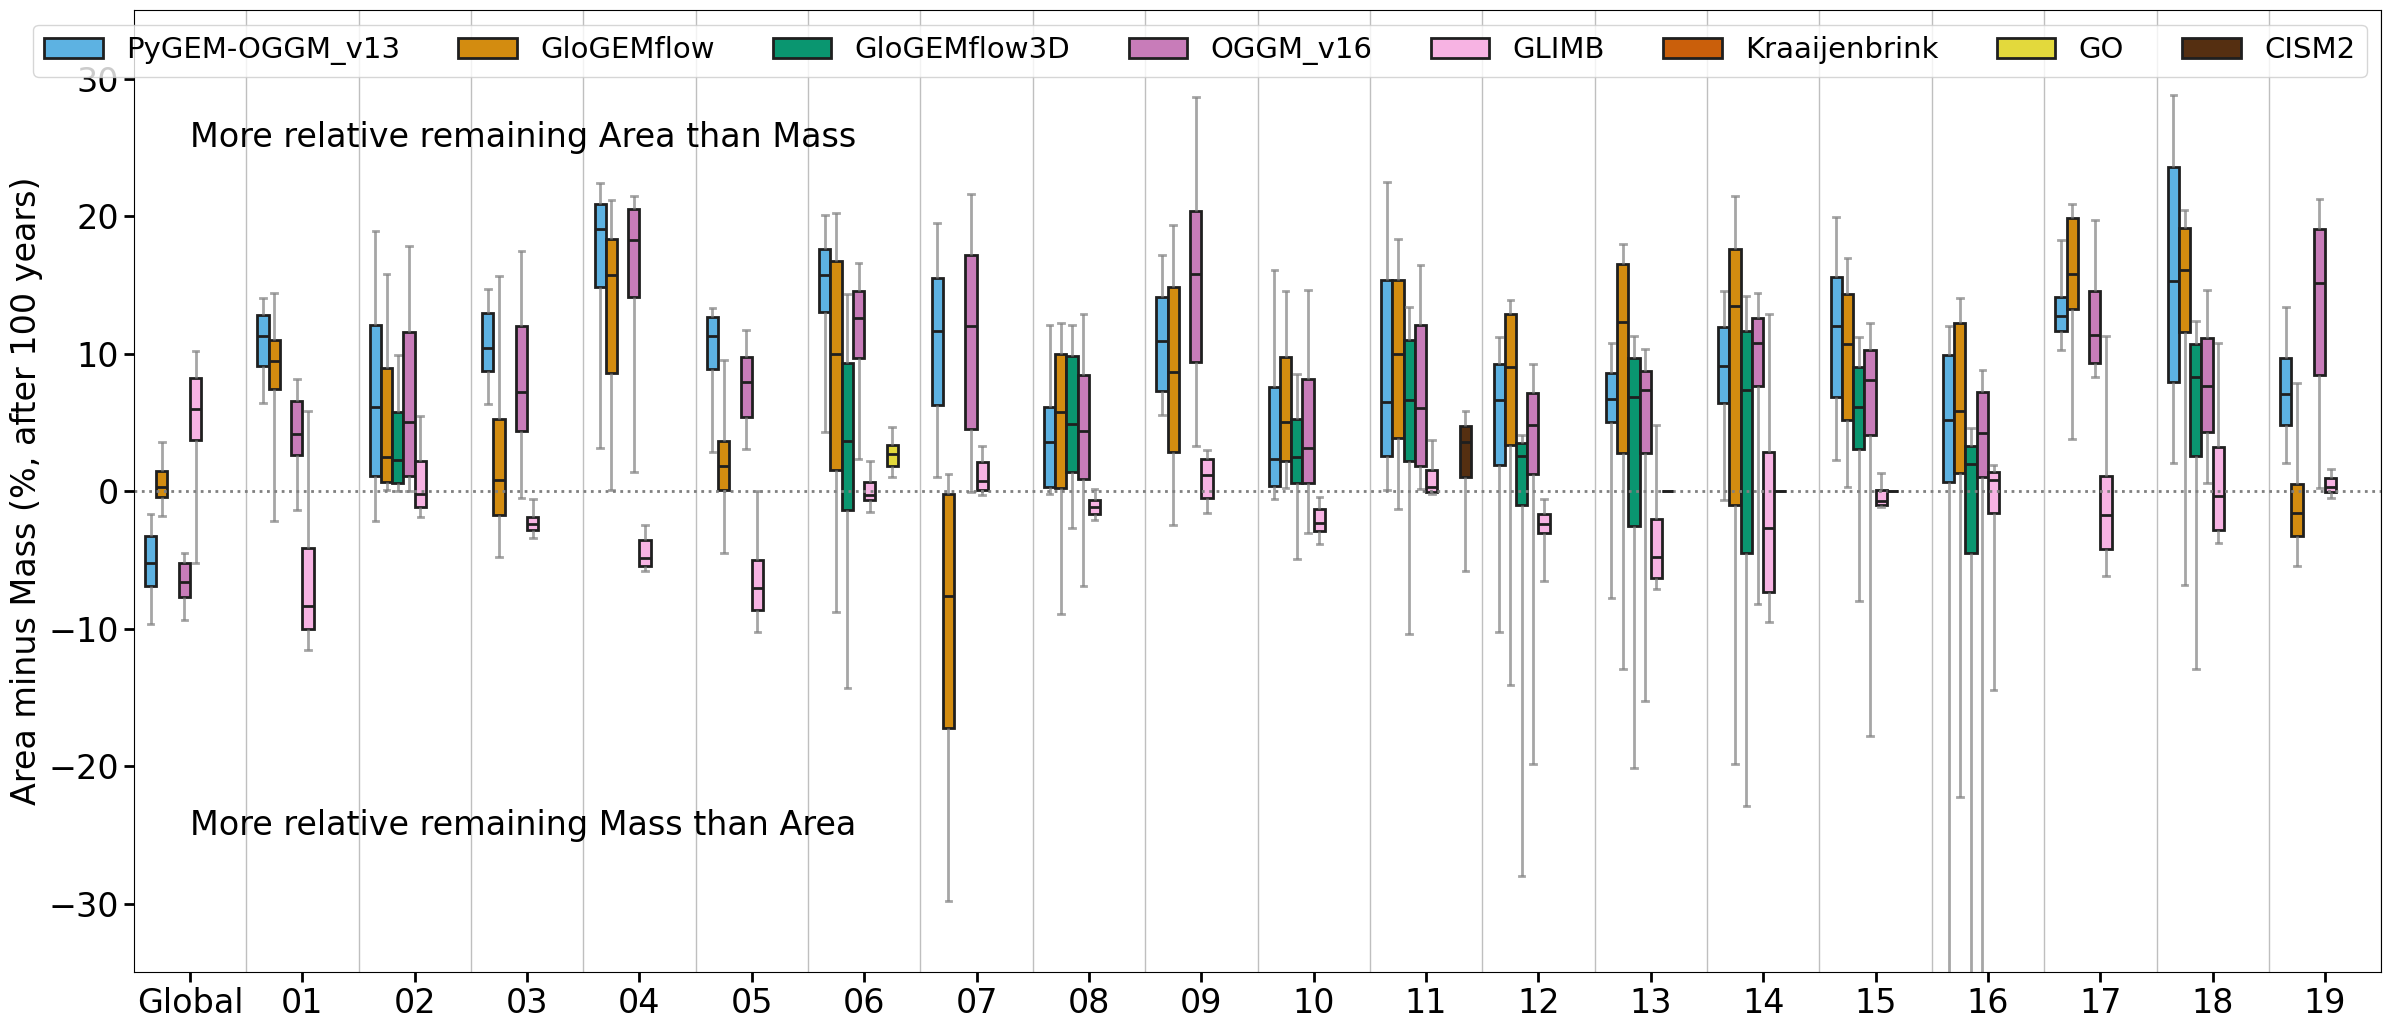

In [381]:
### let's check after roughly 100 years
steady_state = 100*ds_reg_models_extend.sel(simulation_year=slice(90,110)).mean(dim='simulation_year')/ds_reg_models_extend.sel(simulation_year=0)
steady_state['rel_area_volume_diff_perc'] = steady_state.area_m2 - steady_state.volume_m3
steady_state = steady_state.to_dataframe().reset_index().dropna()

steady_state_glob = 100*ds_reg_models_extend.sum(dim='rgi_reg',
                                                 min_count=19).sel(simulation_year=slice(90,110)).mean(dim='simulation_year')/ds_reg_models_extend.sum(dim='rgi_reg',
                                                                                                                                                          min_count=19).sel(simulation_year=0)
steady_state_glob['rel_area_volume_diff_perc'] = steady_state_glob.volume_m3 - steady_state_glob.area_m2
steady_state_glob = steady_state_glob.to_dataframe().reset_index().dropna()
steady_state_glob['rgi_reg'] = 'Global'

steady_state = pd.concat([steady_state_glob, steady_state])
# Define custom sorting order
custom_order = ['Global'] + [f'{i:02}' for i in range(1, 20)]  # 'Global', '01', '02', ..., '12'
# Create a categorical type with the custom order
steady_state['rgi_reg'] = pd.Categorical(steady_state['rgi_reg'], categories=custom_order, ordered=True) 
# Sort the DataFrame by the 'rgi_reg' column
steady_state = steady_state.sort_values('rgi_reg').reset_index(drop=True)

plt.rc('font', size=24)  
plt.figure(figsize=(29,12.5)) #, sharey=True)
ax=plt.gca()
#fig, axs = plt.subplots(2,1,figsize=(29.5,25), sharey=True)
sns.boxplot(data=steady_state, x= 'rgi_reg', y='rel_area_volume_diff_perc', hue='model_author',
           fliersize=0, whis = [5,95], 
                          dodge = True, #hue='ssp',
                          #order = list(_sel_class1_sorted.rgi_reg_long.values), # order after -0.1 to 2.0°C 
                    #y = 'time', #hue_order = ['2040', '2100'],
                    linewidth=2,
                    capprops={'color':'grey', 'alpha':0.7},
                    whiskerprops={'color':'grey', 'alpha':0.7},
                    saturation = 0.9,
            #data=pd_vas, 
           hue_order=hue_order, palette=pal_models, ax=ax)
ax.axhline(0,lw=2,ls=':', color='grey')
ax.set_ylim([-35, 35])
ax.tick_params(axis='both', which='major', width=2, length=7)
ax.tick_params(axis='both', which='minor', width=1, length=5)
ax.set_xlabel('')
for vl in np.arange(0.5,20,1):
    ax.axvline(vl, color='grey', ls='-', alpha = 0.5, lw=1)
plt.ylabel('Area minus Mass (%, after 100 years)')
plt.legend(ncol=8, fontsize=21)
plt.text(0, 25, 'More relative remaining Area than Mass')
plt.text(0, -25, 'More relative remaining Mass than Area')

In [3]:
def resp_time_estimate(model_author='OGGM_v16', perc_change_l=[-50],
                       rgi_reg='11', min_perc_change=25, roll_metric=21, shift_years=False,
                      metric = 'volume_m3'):
    # computes the response timescale estimates for all 80 experiments of a given model_author and rgi_reg 
    # perc_change : -50 (gives estimates of how fast 50% of total volume/area change occurs), also -80 is used in the manuscript
    # min_perc_change: minimum shrinkage/growing to estimate a "response time" (%)
    # HERE, the first occurrence of -50% change over the roll_metric(roll_volume/roll_area) avg. is used, 
    # alternatively we could use the last occurrence, but this would "mean" something different of course ... 
    # we also select the equilibrium volume/area area by averaging over the last 100 years,
    # this is necessary due to the large interdecadal variability of some models
    # MAYBE could even select there 200 or 300 years (but then we would also need to check how the data is "extended"...
    if shift_years:
        # we shift by maximum by +50 years, so like that there should always be values inside 
        _ds_reg_models_extend = ds_reg_yr_shift.sel(year_after_2020=slice(0,4950))
    else:
        _ds_reg_models_extend = ds_reg_models_extend
    if rgi_reg == 'All':
        if model_author in global_models:
            ds_reg_models_vol_all = _ds_reg_models_extend[metric].sum(dim='rgi_reg')
        else:
            raise Exception("not a global model!!!")
    
    else:
        ds_reg_models_vol_all = _ds_reg_models_extend[metric].sel(rgi_reg=rgi_reg) # need to do the interpolation first !

    ds_reg_models_vol_all = ds_reg_models_vol_all.stack(experiments=['gcm','period_scenario'])
    # merge "gcm"s and "period_scenario" into one coordinate callled "experiments"
    ds_reg_models_vol_all = ds_reg_models_vol_all.assign_coords(temp_ch_ipcc = ('experiments',
                                                                      pd_global_temp_exp_m.loc[ds_reg_models_vol_all.experiments, 
                                                                                               'temp_ch_ipcc']))
    ds_reg_models_sel_vol_all = ds_reg_models_vol_all.sel(model_author=model_author)
    # steady state is the average of the last 100 years!!!
    if shift_years:
        v_eq = ds_reg_models_sel_vol_all.sel(year_after_2020=slice(4901-50,5000-50)).mean(dim='year_after_2020')
        v0 = ds_reg_models_sel_vol_all.sel(year_after_2020=0) 
    else:
        v_eq = ds_reg_models_sel_vol_all.sel(simulation_year=slice(4901,5000)).mean(dim='simulation_year')
        v0 = ds_reg_models_sel_vol_all.isel(simulation_year=0)
    
    pd_category_resp_time = pd.DataFrame(index=ds_reg_models_vol_all.experiments)
    if rgi_reg == 'All':
        pd_category_resp_time['rgi_reg'] = f'All'
    else:
        pd_category_resp_time['rgi_reg'] = f'RGI{rgi_reg}'
    pd_category_resp_time['model_author'] = model_author
    pd_category_resp_time['min_perc_change'] = min_perc_change

    pd_category_resp_time.loc[ds_reg_models_vol_all.experiments, 'temp_ch_ipcc']  = ds_reg_models_vol_all.temp_ch_ipcc.values
    # did it grow, shrink or stay the same??? ... this information is later not anymore used
    pd_category_resp_time['category'] = r'similar to V$_{0}$'
    grow_exps = v_eq.where(v_eq/v0 >=1+min_perc_change/100, drop=True).experiments.values
    pd_category_resp_time.loc[grow_exps, 'category'] = 'grow'
    shrink_exps = v_eq.where(v_eq/v0 <=1-min_perc_change/100, drop=True).experiments.values
    pd_category_resp_time.loc[shrink_exps, 'category'] = 'shrink'
    pd_category_resp_time['shift_years'] = shift_years
    for perc_change in perc_change_l:
        # response time computation
        # V(resp_t) = -perc/100 * (V_eq-v0)+v0)
        # we need the absolute because we only want to have either shrinking (negative perc) 
        # or growing (positive perc) experiments
        v_resp_t = v0 + (perc_change/100)*np.abs(v0-v_eq)
        if shift_years:
            v_roll = ds_reg_models_sel_vol_all.rolling(year_after_2020=roll_metric, center=True).mean()
            # we take the last year where the anti-condition holds true (so it is basically the first year where the condition holds true)
            resp_t = v_roll.where(v_roll<=v_resp_t).idxmax(dim='year_after_2020')
            #print(v_roll, resp_t)
        else:
            v_roll = ds_reg_models_sel_vol_all.rolling(simulation_year=roll_metric, center=True).mean()
            # we take the last year where the anti-condition holds true (so it is basically the first year where the condition holds true)
            resp_t = v_roll.where(v_roll<=v_resp_t).idxmax(dim='simulation_year')
        if perc_change<0:
            # if we look at how much it shrinks it should at least shrink by min_perc_change to estimate a "response time"
            resp_t = resp_t.where(v_eq/v0 <=1-min_perc_change/100, np.NaN)
        else:
            # if we look at how much it grows it should at least grow by min_perc_change to estimate a "response time"
            resp_t = resp_t.where(v_eq/v0 >=1+min_perc_change/100, np.NaN)
        if perc_change>0:
            perc_change_i = f'+{perc_change}'
        else:
            perc_change_i = perc_change
        pd_category_resp_time.loc[resp_t.experiments,f'resp_time_{perc_change_i}%'] = resp_t.values
    pd_category_resp_time['metric'] = metric
    return pd_category_resp_time

In [4]:
shift_years = False
rgi_regs_global = ['All', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
                   '13', '14', '15', '16', '17', '18', '19']

if shift_years:
    # we shift by maximum by +50 years, so like that there should always be values inside 
    _ds_reg_models_extend = ds_reg_yr_shift.sel(year_after_2020=slice(0,4950))
    xx = 'year_after_2020'
    pd_reg_models_count = _ds_reg_models_extend.volume_m3.sel(year_after_2020=0).to_dataframe().groupby(['rgi_reg', 'model_author'])['volume_m3'].count().reset_index()
    p_add = '_shifted'
    lab_add = 'after 2020 '

else:
    _ds_reg_models_extend = ds_reg_models_extend
    xx = 'simulation_year'
    pd_reg_models_count = _ds_reg_models_extend.volume_m3.sel(simulation_year=0).to_dataframe().groupby(['rgi_reg', 'model_author'])['volume_m3'].count().reset_index()
    p_add = ''
    lab_add = ''

## rolling mean to estimate the response time scale.. 
roll_metric=21 
# assume that at least 25% change is necessary to estimate a "response timescale"
min_perc_change = 25  # also tested: 1,5,10,20,

In [10]:
load = False
if load: 
    pd_reg_models_count = pd_reg_models_count.loc[pd_reg_models_count.rgi_reg !='All']
    pd_reg_models_count = pd_reg_models_count.rename(columns={'volume_m3':'n_experiments'})
    # models available for each region...
    _regional_model = pd_reg_models_count.loc[pd_reg_models_count.n_experiments > 0 ] # ==80
    
    ## amount of models per region
    # at least 1 experiment for that RGI region
    reg_n_models = pd_reg_models_count.loc[pd_reg_models_count.n_experiments > 0].groupby('rgi_reg').count()['model_author'] 
    # models that are globally available 
    max_exps=pd_reg_models_count.n_experiments.max()
    global_models = pd_reg_models_count.groupby('model_author').sum().where(pd_reg_models_count.groupby('model_author').sum().n_experiments == 19 * max_exps).dropna().index
    
    pd_category_resp_time_l = []
    for metric in ['volume_m3','area_m2']:
        for perc in [-50,-80,-90]: 
            for j, rgi_reg in enumerate(rgi_regs_global): #rgi_regs_global):
                if rgi_reg == 'All':
                    # only take models that exist globally
                    # at the moment Rounce, Glimb, OGGM,GloGEMflow
                    n = len(global_models)
                    mj = 0
                    for m in glac_models:
                        if m in global_models:
                            mj+=1
                            pd_category_resp_time = resp_time_estimate(model_author=m, perc_change_l=[perc],
                               rgi_reg=rgi_reg, min_perc_change=min_perc_change,metric=metric,
                                                                      roll_metric=roll_metric,shift_years=shift_years)
                            pd_category_resp_time_l.append(pd_category_resp_time)
                        else:
                            pass
        
                else:    
                    models_available = _regional_model.loc[_regional_model.rgi_reg==rgi_reg]['model_author'].values
                    n = reg_n_models[rgi_reg]
                    mj=0
                    for m in glac_models:
                        if m in models_available:
                            mj+=1
                            
                            pd_category_resp_time = resp_time_estimate(model_author=m, perc_change_l=[perc],
                                                                       metric=metric,
                                                                       rgi_reg=rgi_reg, min_perc_change=min_perc_change,
                                                                      roll_metric=roll_metric,shift_years=shift_years)
                            pd_category_resp_time_l.append(pd_category_resp_time)
    
    pd_response_time_x_perc_loss = pd.concat(pd_category_resp_time_l)
    # just some reformatting (no real averaging...)
    pd_response_time_x_perc_loss_comp = pd_response_time_x_perc_loss.copy().drop(columns=['category','shift_years']) # loc[pd_response_time_x_perc_loss.rgi_reg !='All']
    pd_response_time_x_perc_loss_comp = pd_response_time_x_perc_loss_comp.reset_index(names=['gcm_period_scenario'])
    # Convert the string representations of tuples into actual tuples
    tuple_list = [eval(str(item)) for item in list(pd_response_time_x_perc_loss_comp['gcm_period_scenario'].values)]
    # Create a new list in 'gcm_period_scenario' format
    reformatted_list = [f"{gcm}_{period_scenario}" for gcm, period_scenario in tuple_list]
    pd_response_time_x_perc_loss_comp['gcm_period_scenario'] = reformatted_list
    pd_response_time_x_perc_loss_comp = pd_response_time_x_perc_loss_comp.groupby(['rgi_reg', 'model_author', 'temp_ch_ipcc','gcm_period_scenario', 'metric']).mean()
    ds_response_time_x_perc_loss_comp = pd_response_time_x_perc_loss_comp.to_xarray()
    
    # this is the difference to the median glacier model 
    for p in [-50,-80,-90]:
        ds_response_time_x_perc_loss_comp[f'diff_resp_time_{p}%'] = ds_response_time_x_perc_loss_comp[f'resp_time_{p}%'] - ds_response_time_x_perc_loss_comp[f'resp_time_{p}%'].median(dim='model_author') 
    
    pd_response_time_x_perc_loss_comp = ds_response_time_x_perc_loss_comp.to_dataframe().reset_index()
    pd_response_time_x_perc_loss_comp = pd_response_time_x_perc_loss_comp.dropna()
    
    # create "classes" of global temp. change <--- not anymore used ... 
    #T0_l, T1_l = [], []
    #temp_labels = []
    #for t0, t1 in zip([min_t_r, 2, 4],[2, 4, max_t_r]):
    #    temp_label = f'{t0:.1f}°C-{t1:.1f}°C'
    #    condi = (pd_response_time_x_perc_loss_comp.temp_ch_ipcc <=t1)&(pd_response_time_x_perc_loss_comp.temp_ch_ipcc >=t0)
    #    temp_labels_length_l = len(pd_response_time_x_perc_loss_comp.loc[condi].groupby('temp_ch_ipcc').count())
    #    pd_response_time_x_perc_loss_comp.loc[condi, 'temp_ch_classes'] = temp_label + f' (n={temp_labels_length_l})'
    # for the summary plot using the K-means clustering in 3_fitted_glacier_response.... 
    
    pd_response_time_x_perc_loss_comp['min_perc_change'] =min_perc_change
    pd_response_time_x_perc_loss_comp.reset_index(drop=True).to_csv(f'PartB_data/resp_time_non_shifted_for_deltaT_rgi_reg_roll_volume_area_{roll_metric}yravg.csv')
    
else:
    pd_response_time_x_perc_loss_comp = pd.read_csv(f'PartB_data/resp_time_non_shifted_for_deltaT_rgi_reg_roll_volume_area_{roll_metric}yravg.csv', index_col=[0])


In [155]:
pd_response_time_x_perc_loss_comp.loc[pd_response_time_x_perc_loss_comp.rgi_reg=='All','rgi_reg'] = 'Global'
for r in pd_response_time_x_perc_loss_comp.rgi_reg.unique():
    if 'RGI' in r:
        pd_response_time_x_perc_loss_comp.loc[pd_response_time_x_perc_loss_comp.rgi_reg==r,'rgi_reg'] = r[3:]

In [169]:
# Define custom sorting order
custom_order = ['Global'] + [f'{i:02}' for i in range(1, 20)]  # 'Global', '01', '02', ..., '12'
# Create a categorical type with the custom order
pd_response_time_x_perc_loss_comp['rgi_reg'] = pd.Categorical(pd_response_time_x_perc_loss_comp['rgi_reg'], categories=custom_order, ordered=True) 
# Sort the DataFrame by the 'rgi_reg' column
pd_response_time_x_perc_loss_comp = pd_response_time_x_perc_loss_comp.sort_values('rgi_reg').reset_index(drop=True)

In [170]:
pd_response_time_x_perc_loss_comp = pd_response_time_x_perc_loss_comp.reset_index(drop=True)

In [171]:
_ds = pd_response_time_x_perc_loss_comp.groupby(['rgi_reg', 'model_author', 'temp_ch_ipcc','gcm_period_scenario', 'metric']).mean().to_xarray()

/tmp/ipykernel_13252/3577821938.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  _ds = pd_response_time_x_perc_loss_comp.groupby(['rgi_reg', 'model_author', 'temp_ch_ipcc','gcm_period_scenario', 'metric']).mean().to_xarray()


In [172]:
_diff_area_volume_resp_t = _ds['resp_time_-80%'].sel(metric='area_m2') - _ds['resp_time_-80%'].sel(metric='volume_m3')
_diff_area_volume_resp_t_50 = _ds['resp_time_-50%'].sel(metric='area_m2') - _ds['resp_time_-50%'].sel(metric='volume_m3')

In [173]:
_diff_area_volume_resp_t

<xarray.DataArray 'resp_time_-80%' (rgi_reg: 20, model_author: 9,
                                    temp_ch_ipcc: 80, gcm_period_scenario: 80)>
array([[[[ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         ...,
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

        [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         ...,
         [ nan,  nan,  nan, ...,  nan, -45.,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan, -34.]],

        [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         ...,
...
         ...,
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

        [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         ...,
         [ nan,  nan,  nan, ...,  nan,  29.,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  23.]],

        [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         ...,
         [ nan,  nan,  nan, ...,  nan,  87.,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  75.]]]])
Coordinates:
  * rgi_reg              (rgi_reg) object 'Global' '01' '02' ... '17' '18' '19'
  * model_author         (model_author) object 'CISM2' ... 'PyGEM-OGGM_v13'
  * temp_ch_ipcc         (temp_ch_ipcc) float64 -0.1435 -0.1319 ... 5.849 6.884
  * gcm_period_scenario  (gcm_period_scenario) object 'gfdl-esm4_1851-1870_hi...

Text(0.5, 0, '')

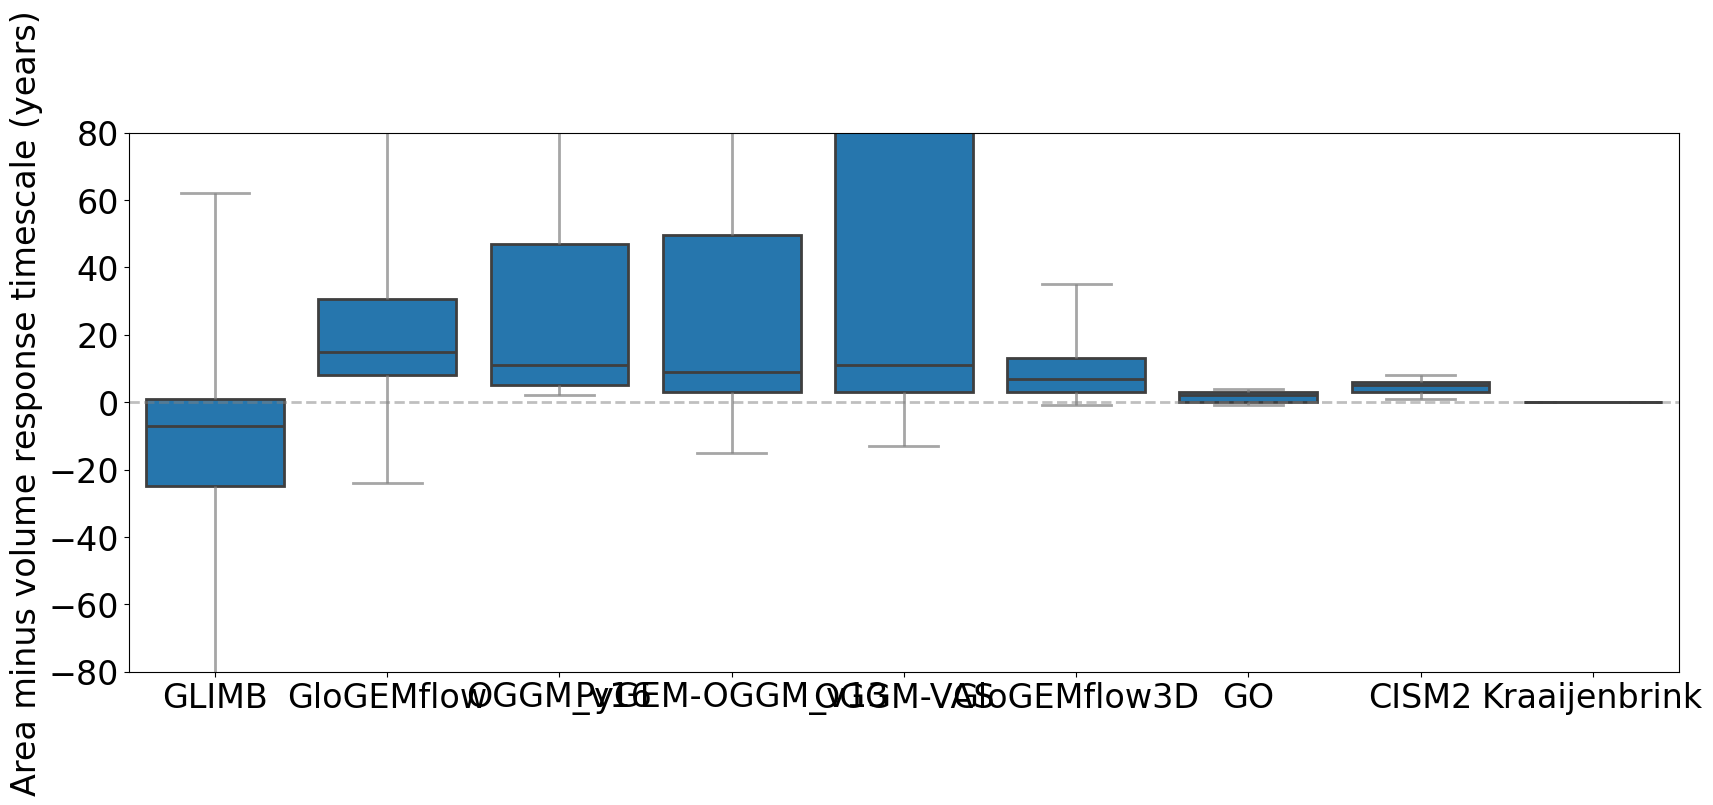

In [174]:
plt.figure(figsize=(20,7))
sns.boxplot(data=_diff_area_volume_resp_t.to_dataframe().dropna().reset_index(),
            x='model_author', y='resp_time_-80%', 
           fliersize=0, whis = [5,95], 
                          dodge = True, #hue='ssp',
                          #order = list(_sel_class1_sorted.rgi_reg_long.values), # order after -0.1 to 2.0°C 
                    #y = 'time', #hue_order = ['2040', '2100'],
                    linewidth=2,
                    capprops={'color':'grey', 'alpha':0.7},
                    whiskerprops={'color':'grey', 'alpha':0.7},
                    saturation = 0.9)
plt.ylim([-80,80])
plt.axhline(0, ls='--', color='grey', lw=2, alpha = 0.5)
plt.ylabel('Area minus volume response timescale (years)')
plt.xlabel('')

Text(0.5, 0, '')

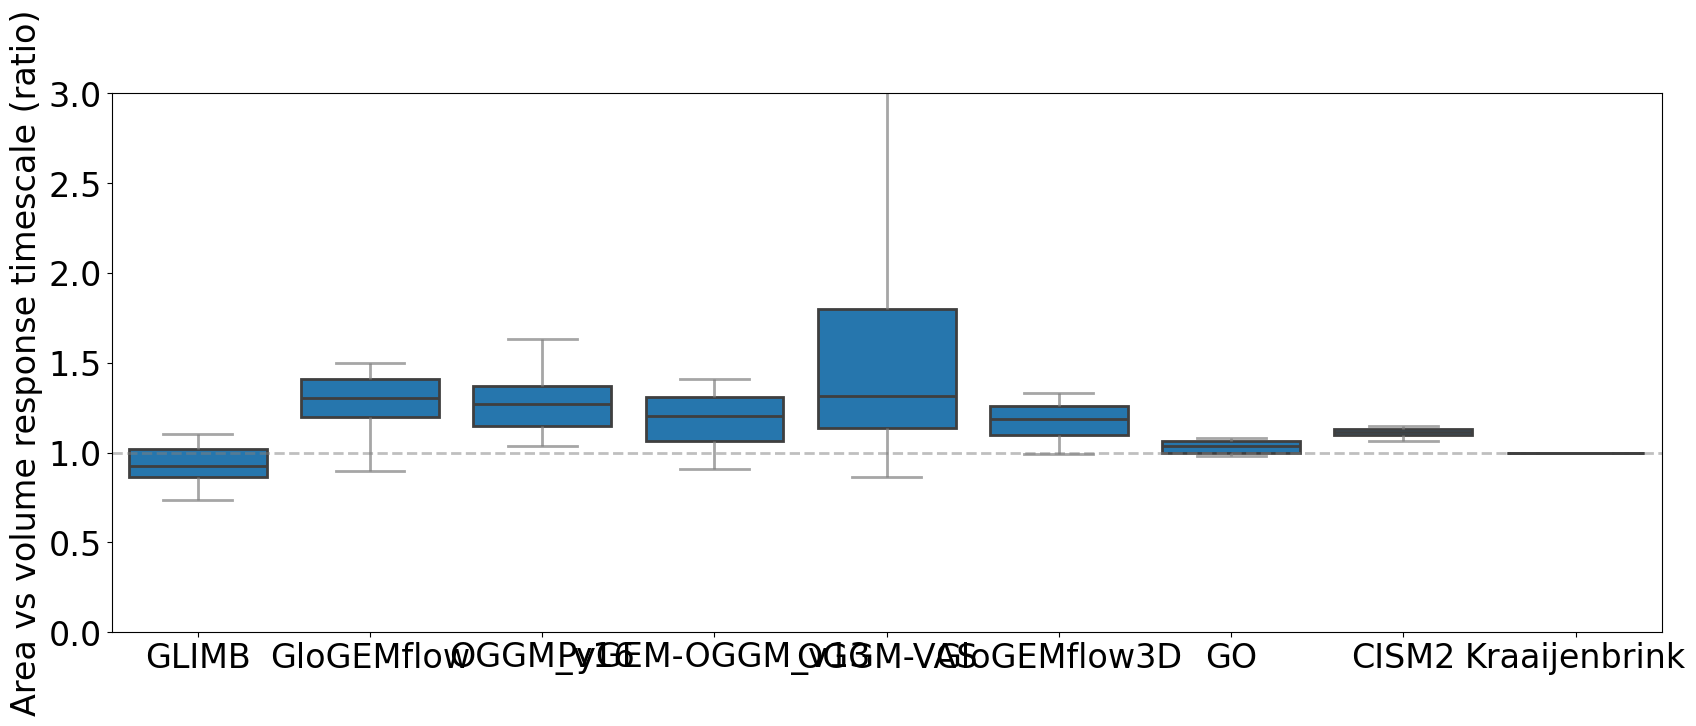

In [175]:
_ratio_area_volume_resp_t = _ds['resp_time_-80%'].sel(metric='area_m2')/_ds['resp_time_-80%'].sel(metric='volume_m3')

plt.figure(figsize=(20,7))
sns.boxplot(data=_ratio_area_volume_resp_t.to_dataframe().dropna().reset_index(),
            x='model_author', y='resp_time_-80%', 
           fliersize=0, whis = [5,95], 
                          dodge = True, #hue='ssp',
                          #order = list(_sel_class1_sorted.rgi_reg_long.values), # order after -0.1 to 2.0°C 
                    #y = 'time', #hue_order = ['2040', '2100'],
                    linewidth=2,
                    capprops={'color':'grey', 'alpha':0.7},
                    whiskerprops={'color':'grey', 'alpha':0.7},
                    saturation = 0.9)
plt.ylim([0,3])
plt.axhline(1, ls='--', color='grey', lw=2, alpha = 0.5)
plt.ylabel('Area vs volume response timescale (ratio)')
plt.xlabel('')

['PyGEM-OGGM_v13', 'GloGEMflow', 'GloGEMflow3D', 'OGGM_v16', 'GLIMB', 'Kraaijenbrink', 'GO', 'CISM2'] ['model 1', 'model 2', 'model 3', 'model 4', 'model 5', 'model 6', 'model 7', 'model 8']


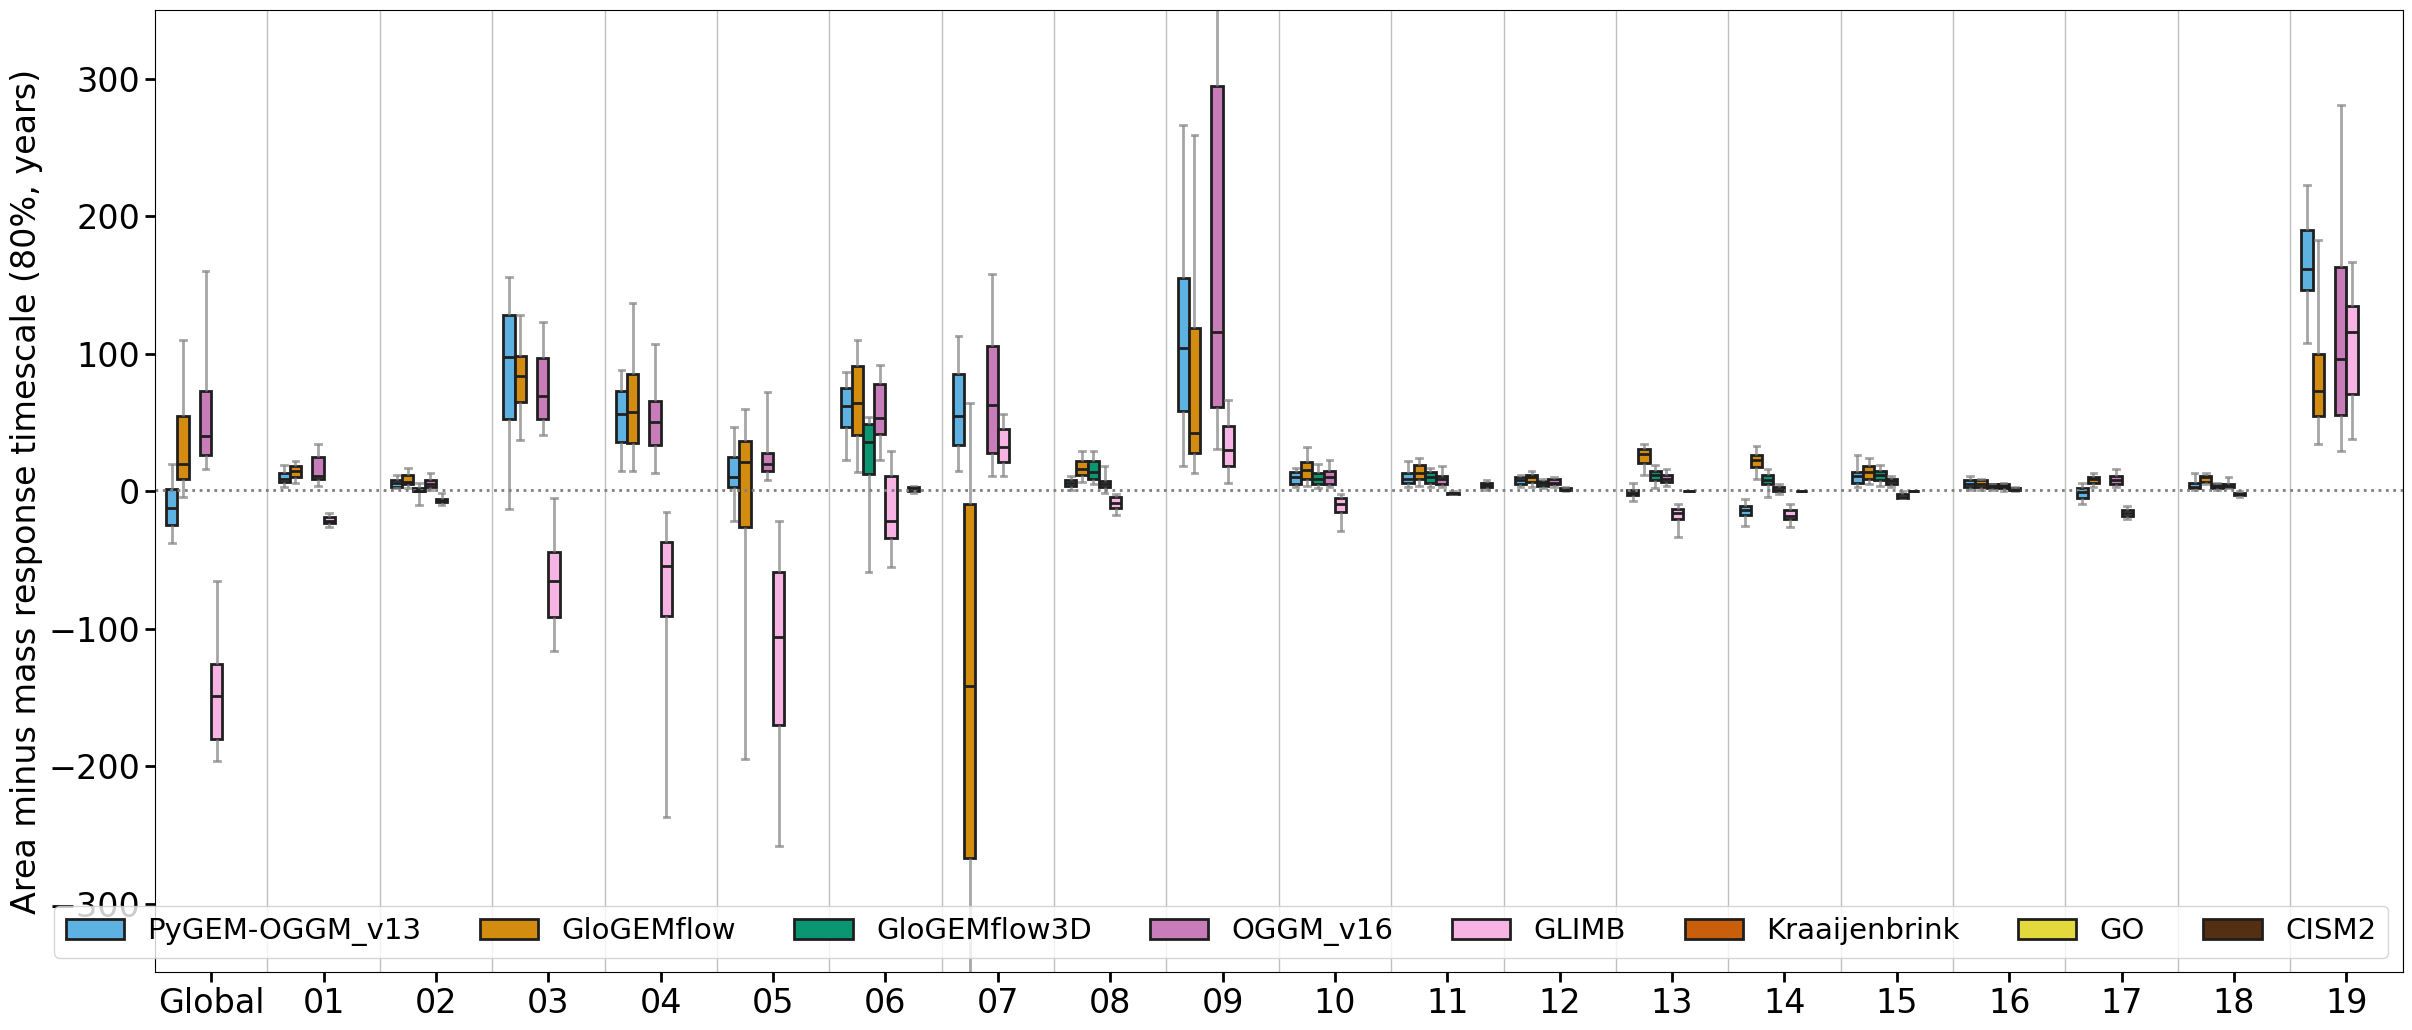

In [184]:
plt.rc('font', size=24)  
plt.figure(figsize=(29,12.5)) #, sharey=True)
ax=plt.gca()
#fig, axs = plt.subplots(2,1,figsize=(29.5,25), sharey=True)
sns.boxplot(data=_diff_area_volume_resp_t.to_dataframe().dropna().reset_index(),
            x='rgi_reg', y='resp_time_-80%', 
           fliersize=0, whis = [5,95], 
                          dodge = True, #hue='ssp',
                          #order = list(_sel_class1_sorted.rgi_reg_long.values), # order after -0.1 to 2.0°C 
                    #y = 'time', #hue_order = ['2040', '2100'],
                    linewidth=2,
                    capprops={'color':'grey', 'alpha':0.7},
                    whiskerprops={'color':'grey', 'alpha':0.7},
                    saturation = 0.9,
            #data=pd_vas, 
            hue='model_author', #y='gamma', x='rgi_reg',
           hue_order=hue_order, palette=pal_models, ax=ax)
ax.axhline(1,lw=2,ls=':', color='grey')
ax.set_ylim([-350, 350])
ax.tick_params(axis='both', which='major', width=2, length=7)
ax.tick_params(axis='both', which='minor', width=1, length=5)
ax.set_xlabel('')
for vl in np.arange(0.5,20,1):
    ax.axvline(vl, color='grey', ls='-', alpha = 0.5, lw=1)
plt.ylabel('Area minus mass response timescale (80%, years)')
plt.legend(ncol=8, fontsize=21)

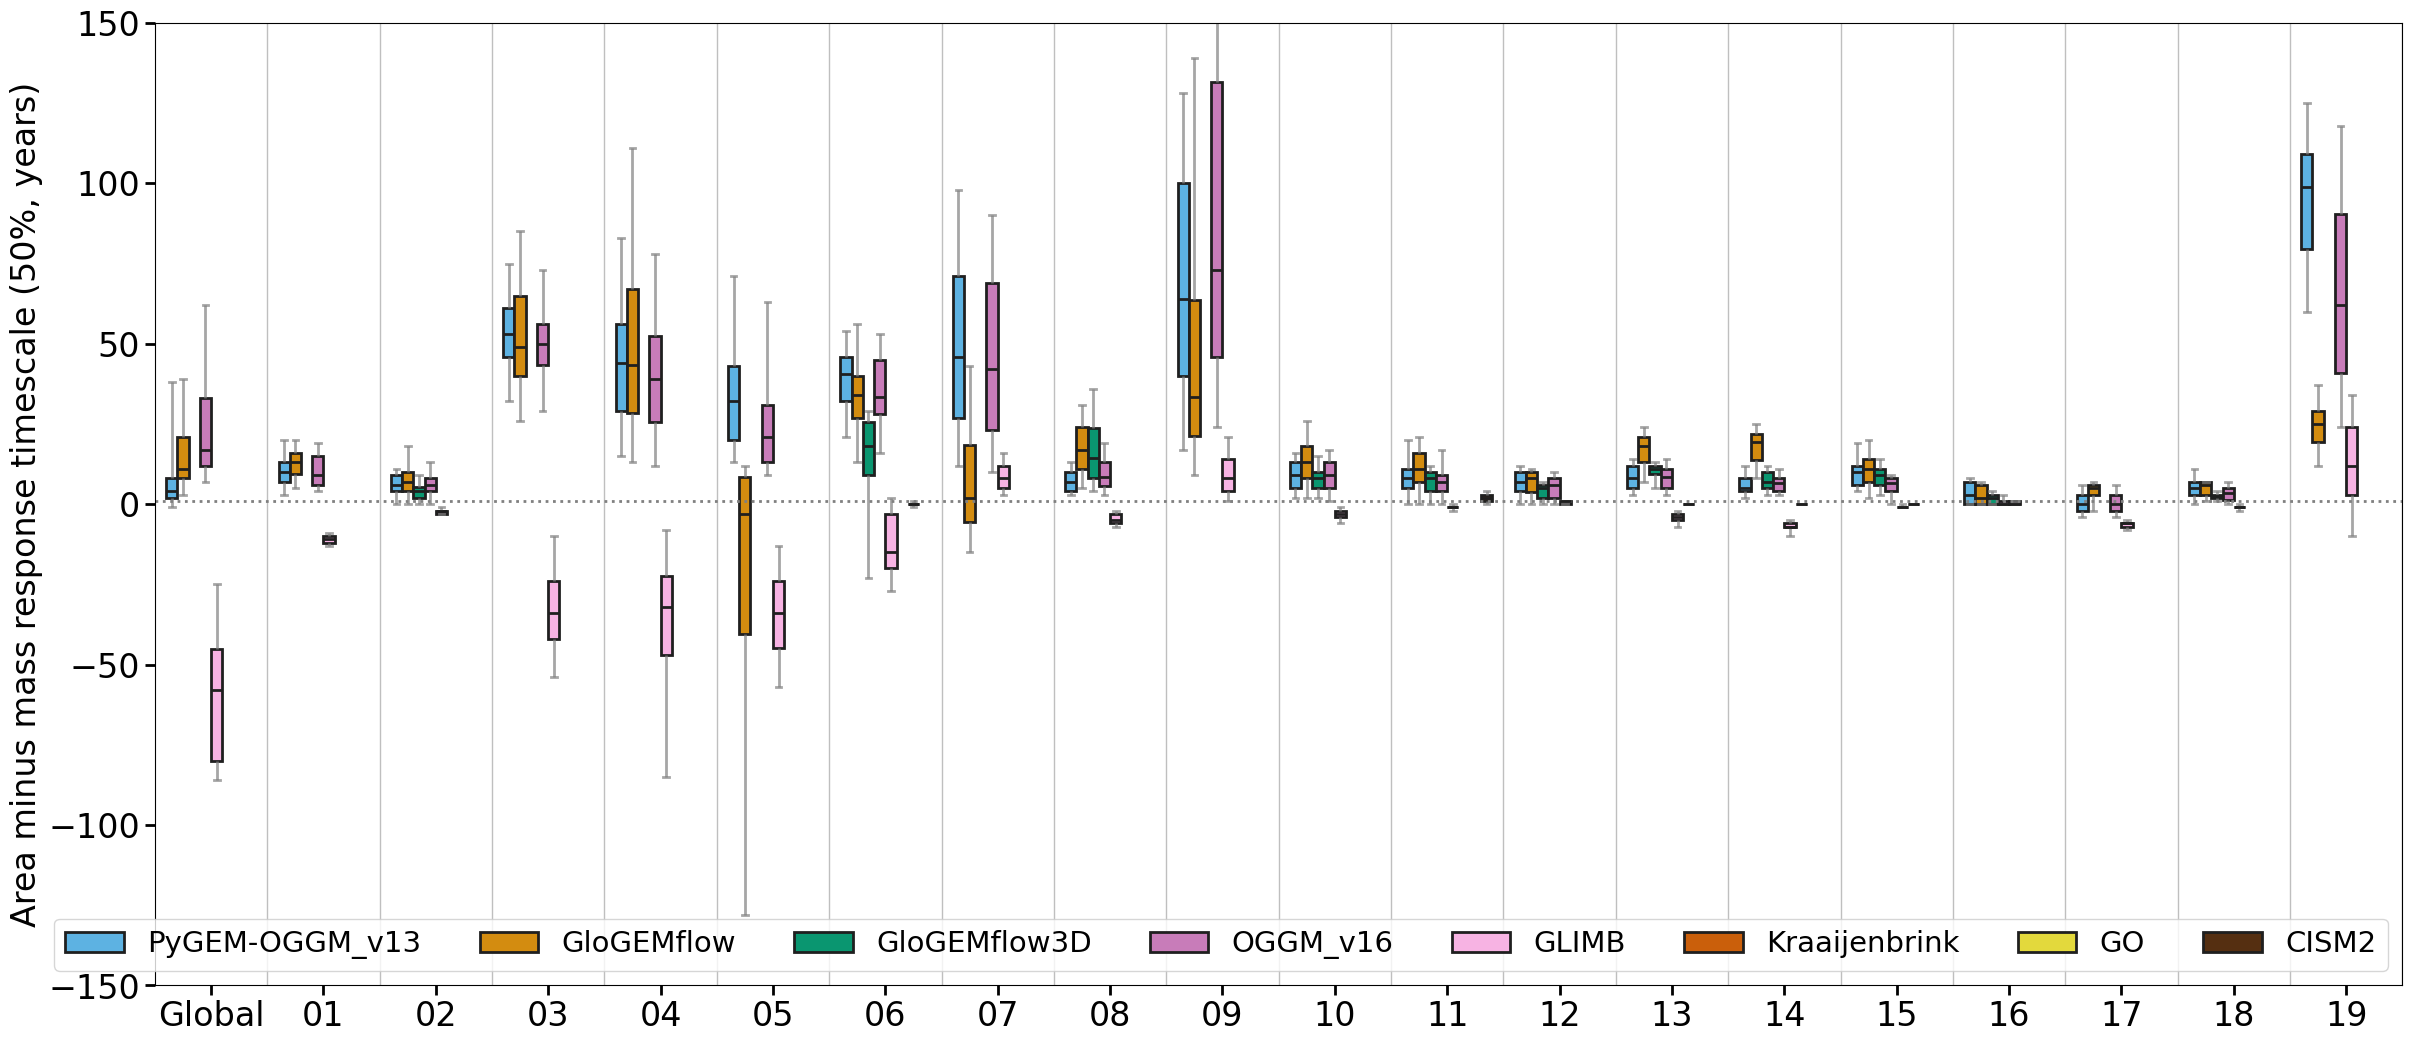

In [182]:
plt.rc('font', size=24)  
plt.figure(figsize=(29,12.5)) #, sharey=True)
ax=plt.gca()
#fig, axs = plt.subplots(2,1,figsize=(29.5,25), sharey=True)
sns.boxplot(data=_diff_area_volume_resp_t_50.to_dataframe().dropna().reset_index(),
            x='rgi_reg', y='resp_time_-50%', 
           fliersize=0, whis = [5,95], 
                          dodge = True, #hue='ssp',
                          #order = list(_sel_class1_sorted.rgi_reg_long.values), # order after -0.1 to 2.0°C 
                    #y = 'time', #hue_order = ['2040', '2100'],
                    linewidth=2,
                    capprops={'color':'grey', 'alpha':0.7},
                    whiskerprops={'color':'grey', 'alpha':0.7},
                    saturation = 0.9,
            #data=pd_vas, 
            hue='model_author', #y='gamma', x='rgi_reg',
           hue_order=hue_order, palette=pal_models, ax=ax)
ax.axhline(1,lw=2,ls=':', color='grey')
ax.set_ylim([-150, 150])
ax.tick_params(axis='both', which='major', width=2, length=7)
ax.tick_params(axis='both', which='minor', width=1, length=5)
ax.set_xlabel('')
for vl in np.arange(0.5,20,1):
    ax.axvline(vl, color='grey', ls='-', alpha = 0.5, lw=1)
plt.ylabel('Area minus mass response timescale (50%, years)')
plt.legend(ncol=8, fontsize=21)

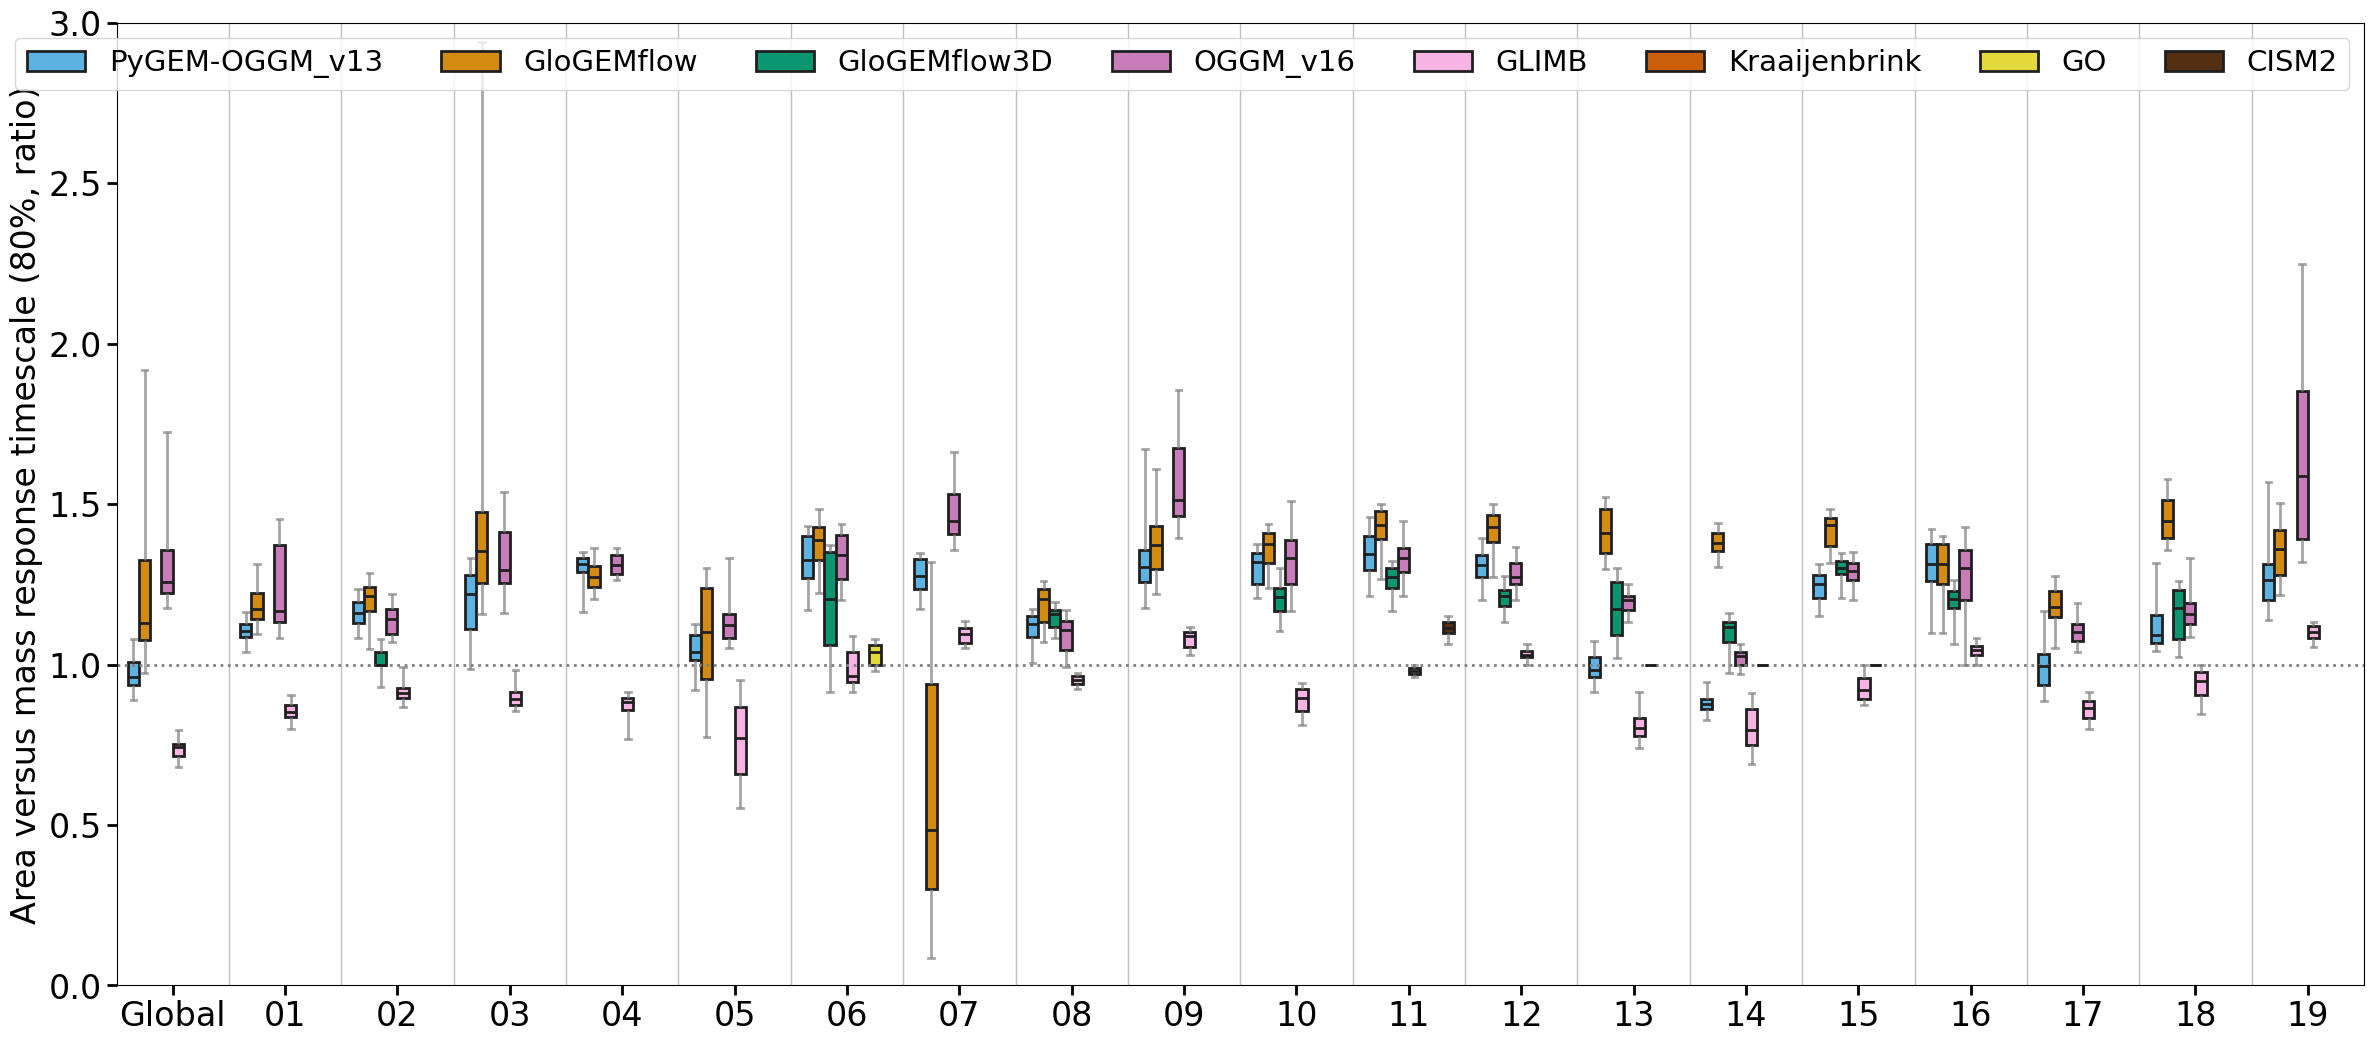

In [183]:
plt.rc('font', size=24)  
plt.figure(figsize=(29,12.5)) #, sharey=True)
ax=plt.gca()
#fig, axs = plt.subplots(2,1,figsize=(29.5,25), sharey=True)
sns.boxplot(data=_ratio_area_volume_resp_t.to_dataframe().dropna().reset_index(),
            x='rgi_reg', y='resp_time_-80%', 
           fliersize=0, whis = [5,95], 
                          dodge = True, #hue='ssp',
                          #order = list(_sel_class1_sorted.rgi_reg_long.values), # order after -0.1 to 2.0°C 
                    #y = 'time', #hue_order = ['2040', '2100'],
                    linewidth=2,
                    capprops={'color':'grey', 'alpha':0.7},
                    whiskerprops={'color':'grey', 'alpha':0.7},
                    saturation = 0.9,
            #data=pd_vas, 
            hue='model_author', #y='gamma', x='rgi_reg',
           hue_order=hue_order, palette=pal_models, ax=ax)
ax.axhline(1,lw=2,ls=':', color='grey')
ax.set_ylim([0, 3])
ax.tick_params(axis='both', which='major', width=2, length=7)
ax.tick_params(axis='both', which='minor', width=1, length=5)
ax.set_xlabel('')
for vl in np.arange(0.5,20,1):
    ax.axvline(vl, color='grey', ls='-', alpha = 0.5, lw=1)
plt.ylabel('Area versus mass response timescale (80%, ratio)')
plt.legend(ncol=8, fontsize=21)

**Quick check just without the scaled data (with the raw data)**

In [262]:

ds_raw = xr.open_dataset('../data/GMIP3_reg_glacier_model_data/glacierMIP3_Feb12_2024_models_all_rgi_regions_sum.nc')

In [322]:
ds_raw

<xarray.Dataset>
Dimensions:          (model_author: 10, simulation_year: 5001, gcm: 5,
                      rgi_reg: 19, period_scenario: 16)
Coordinates:
  * model_author     (model_author) <U14 'CISM2' 'GO' ... 'GloGEMflow3D'
  * simulation_year  (simulation_year) int16 0 1 2 3 4 ... 4997 4998 4999 5000
  * gcm              (gcm) <U13 'gfdl-esm4' 'ipsl-cm6a-lr' ... 'ukesm1-0-ll'
  * rgi_reg          (rgi_reg) <U2 '01' '02' '03' '04' ... '16' '17' '18' '19'
  * period_scenario  (period_scenario) <U16 '1851-1870_hist' ... '2081-2100_s...
Data variables:
    volume_m3        (model_author, gcm, rgi_reg, simulation_year, period_scenario) float32 ...
    area_m2          (model_author, gcm, rgi_reg, simulation_year, period_scenario) float32 ...
Attributes:
    description:           Unprocessed regionally aggregated glacier model pr...
    postprocessing_phase:  Unprocessed dataset with the "raw" regional files ...

In [264]:
#ds_raw_glob = ds_raw.sel(rgi_reg='11').dropna(dim='model_author', how='all')

In [299]:
metric = 'area_m2'
perc_change = -80
roll_metric=21
min_perc_change = 25

In [300]:
#ds_raw_glob = ds_raw_glob[metric].sel(period_scenario=['2021-2040_ssp126', '2021-2040_ssp370', '2021-2040_ssp585',
#       '2041-2060_ssp126', '2041-2060_ssp370', '2041-2060_ssp585',
#       '2061-2080_ssp126', '2061-2080_ssp370', '2061-2080_ssp585',
#       '2081-2100_ssp126', '2081-2100_ssp370', '2081-2100_ssp585'])

In [323]:
v_roll.sel(simulation_year=

<xarray.Dataset>
Dimensions:          (model_author: 5, simulation_year: 5001, gcm: 5,
                      period_scenario: 16)
Coordinates:
  * model_author     (model_author) <U14 'PyGEM-OGGM_v13' ... 'OGGM_v16'
  * simulation_year  (simulation_year) int16 0 1 2 3 4 ... 4997 4998 4999 5000
  * gcm              (gcm) <U13 'gfdl-esm4' 'ipsl-cm6a-lr' ... 'ukesm1-0-ll'
  * period_scenario  (period_scenario) <U16 '1851-1870_hist' ... '2081-2100_s...
Data variables:
    volume_m3        (model_author, gcm, simulation_year, period_scenario) float32 ...
    area_m2          (model_author, gcm, simulation_year, period_scenario) float32 ...

/tmp/ipykernel_13252/1130483150.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


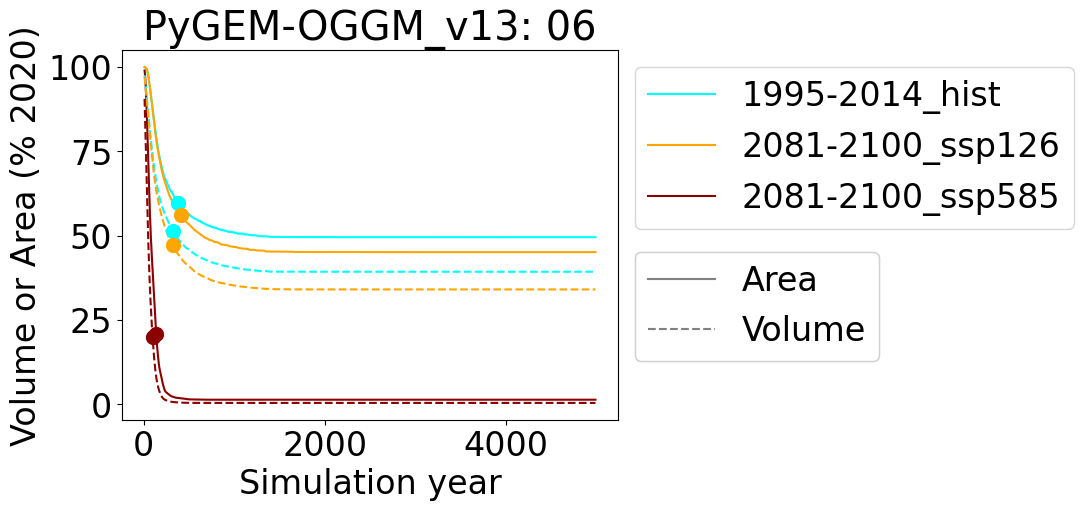

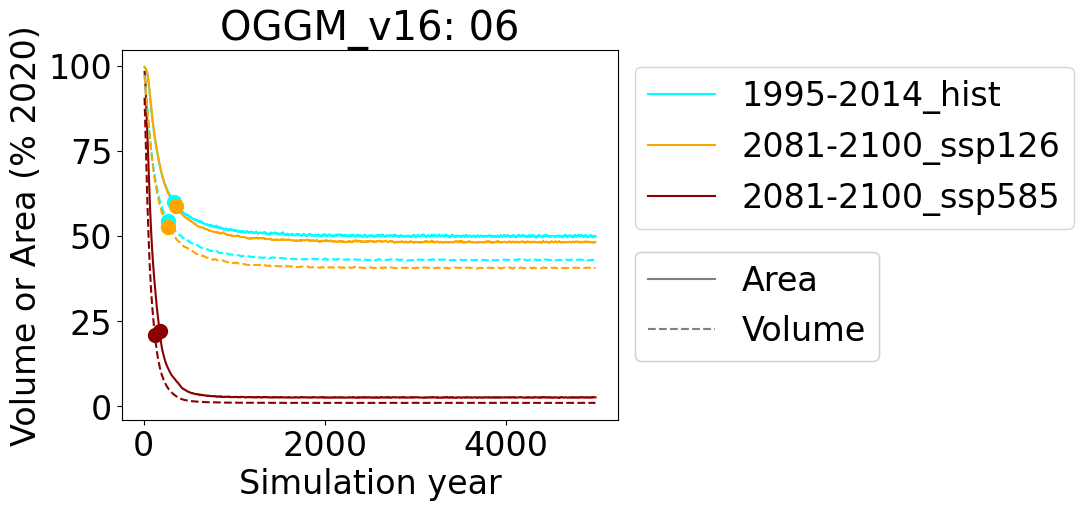

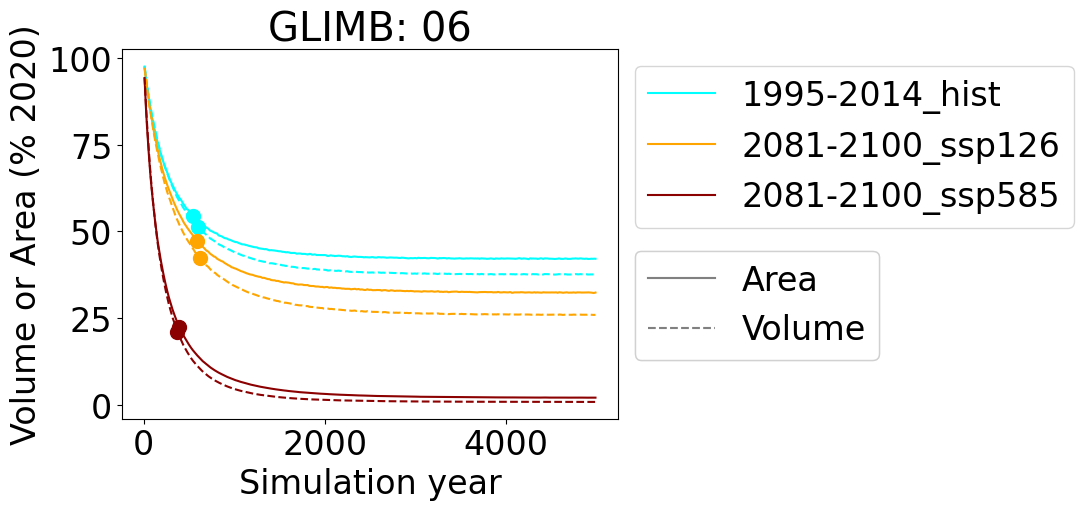

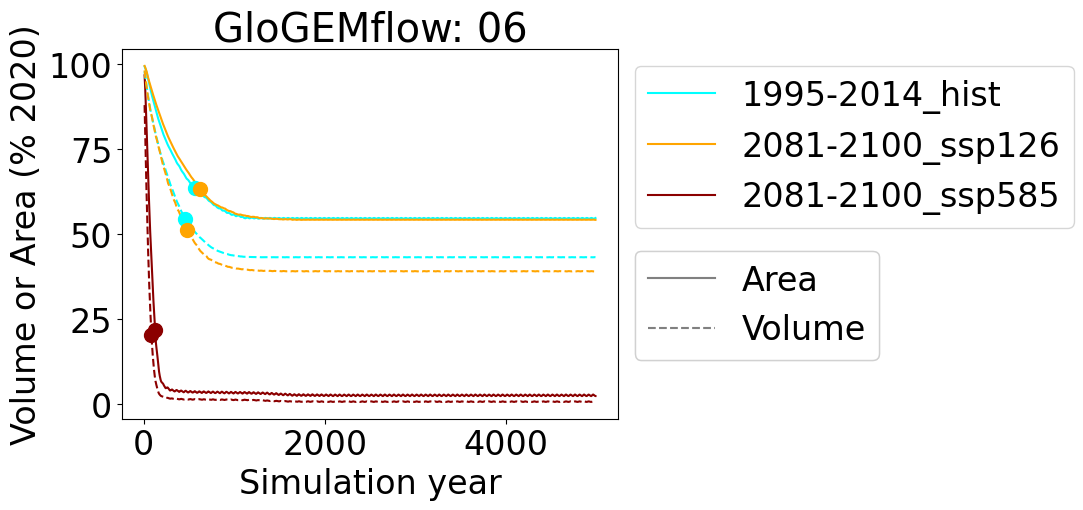

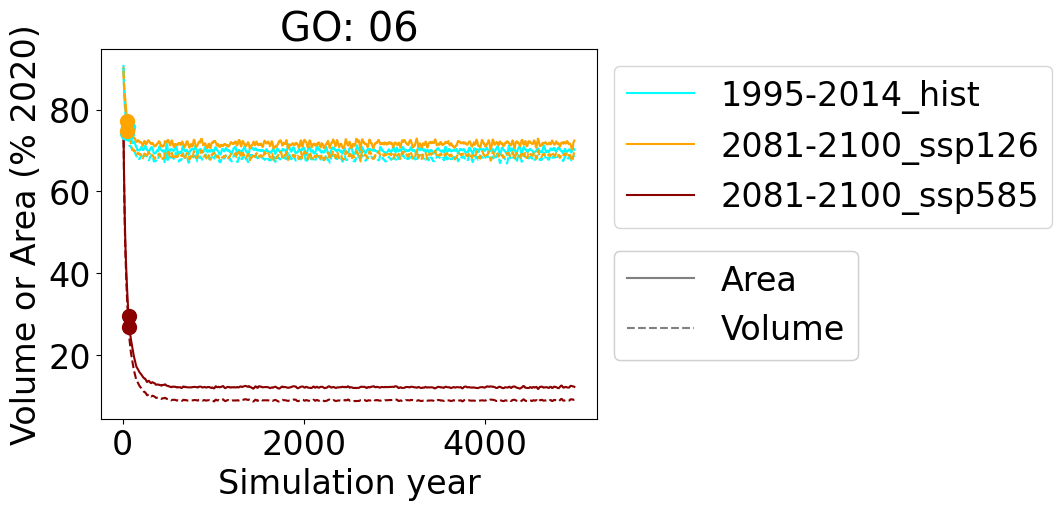

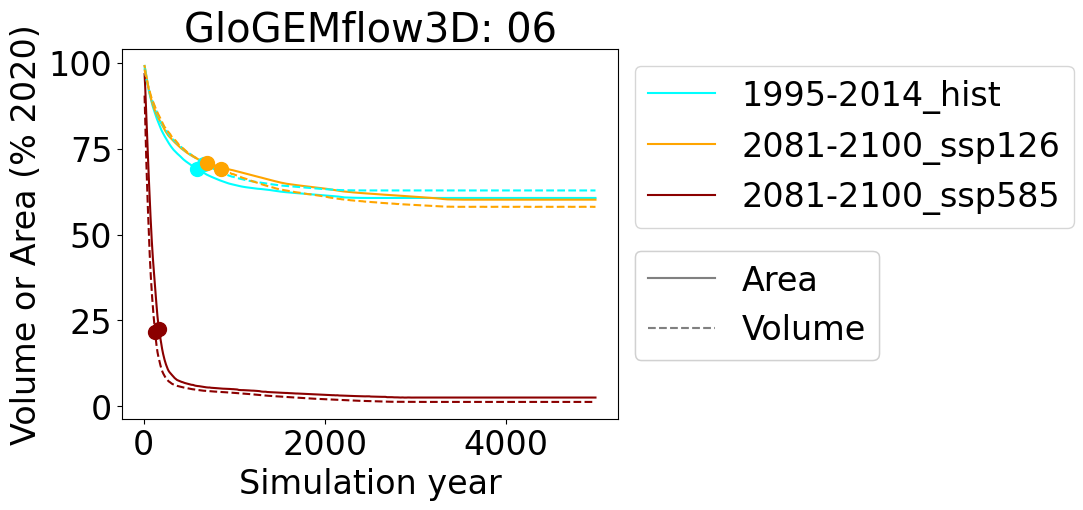

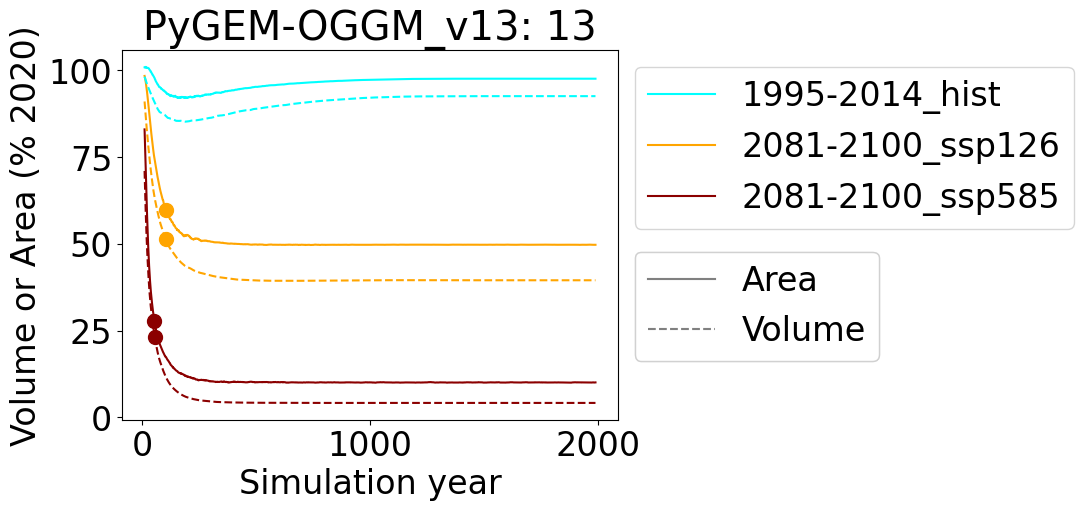

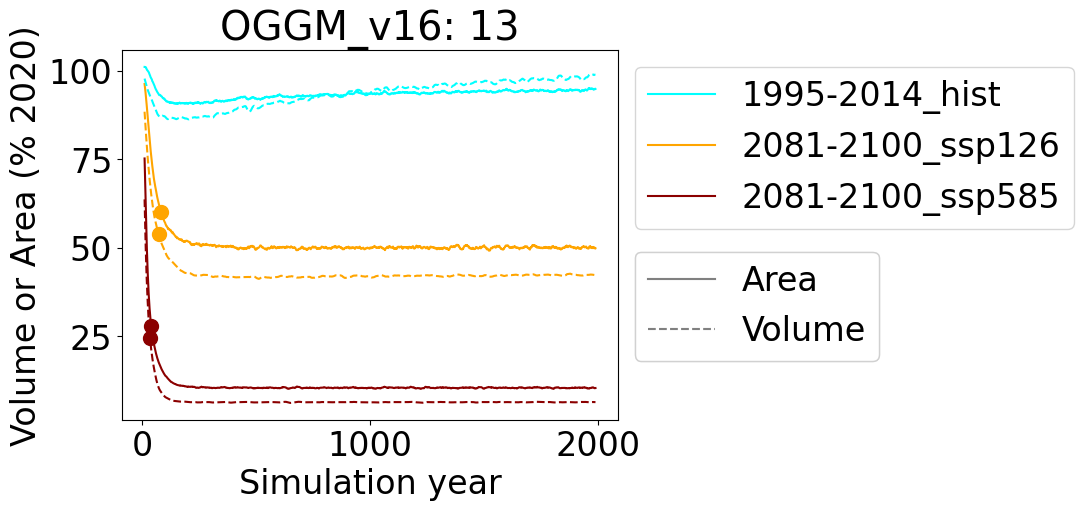

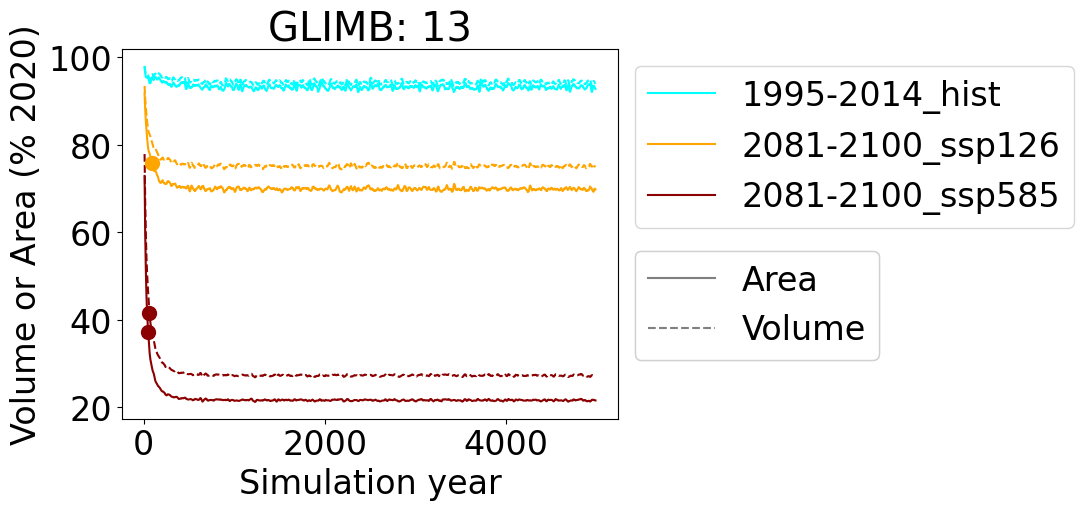

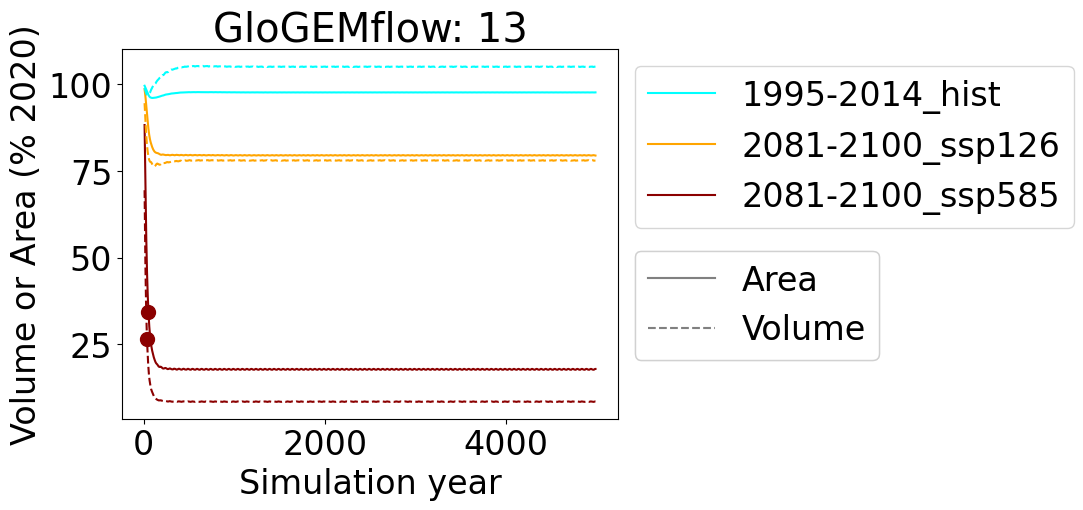

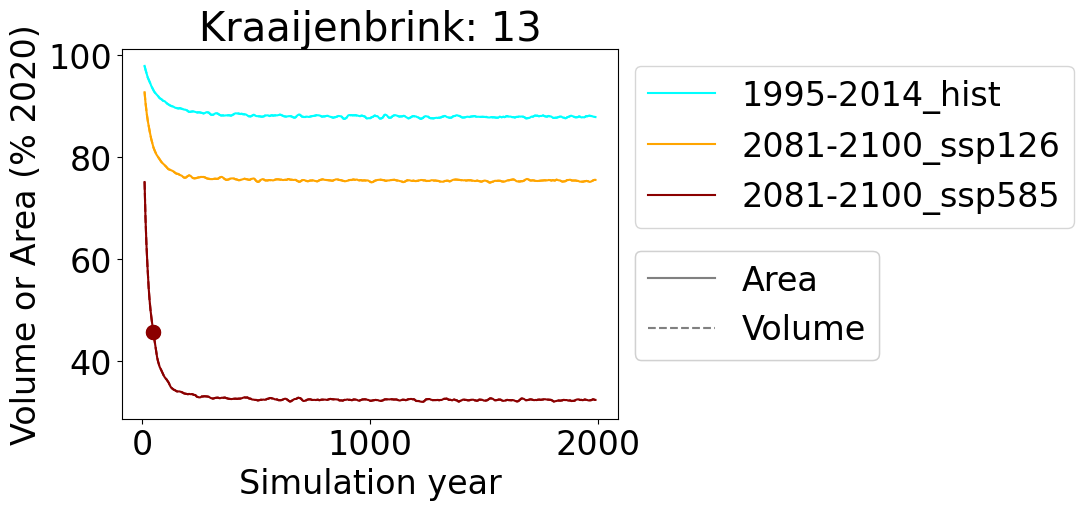

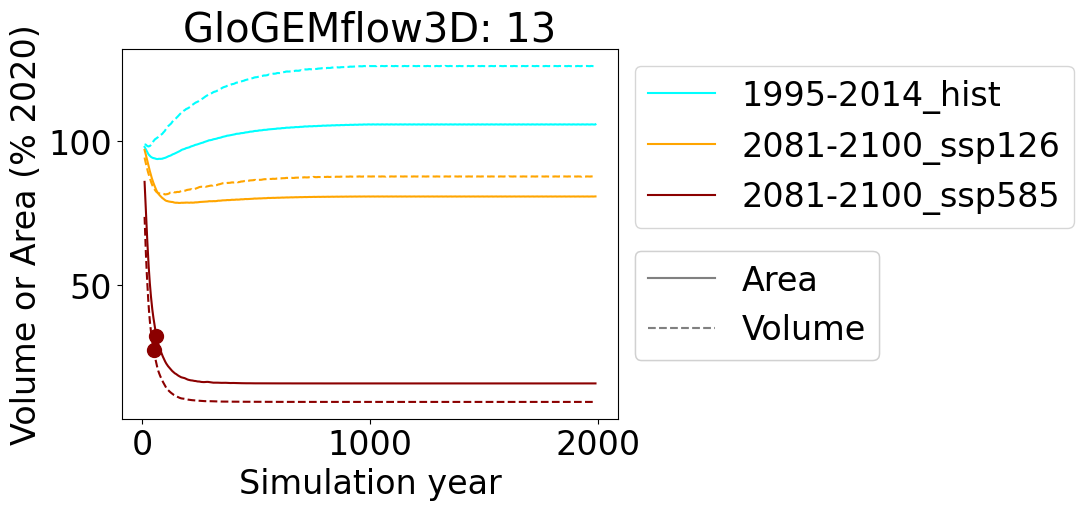

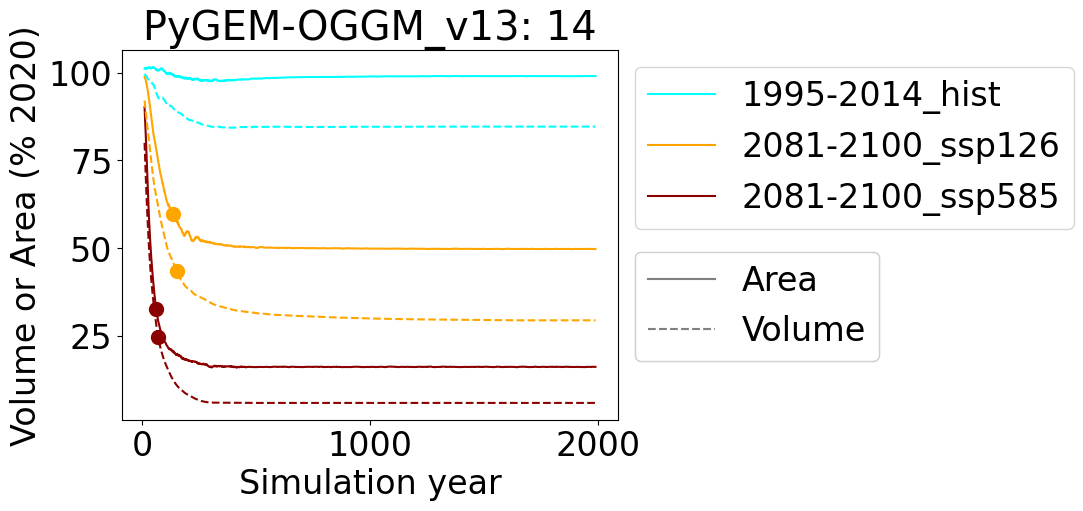

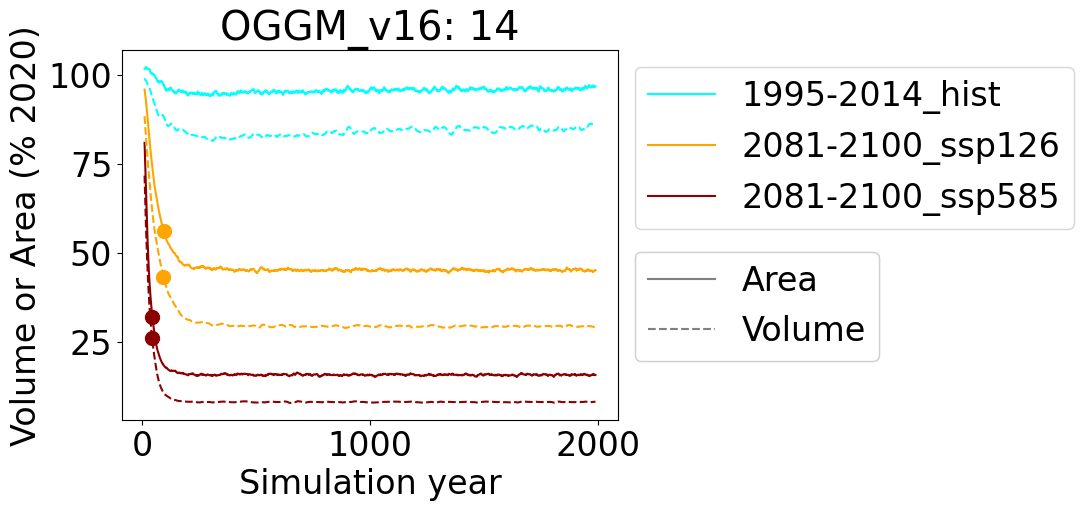

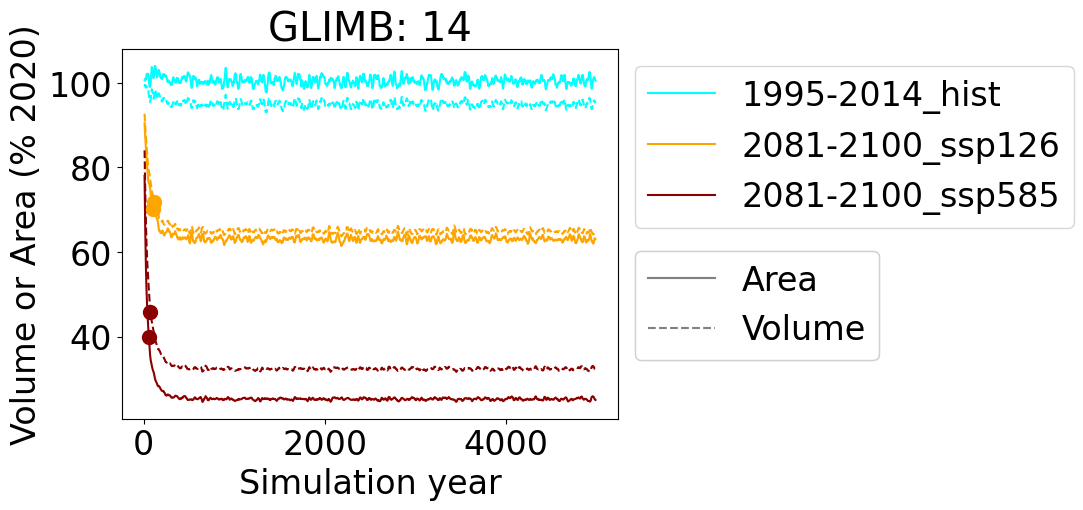

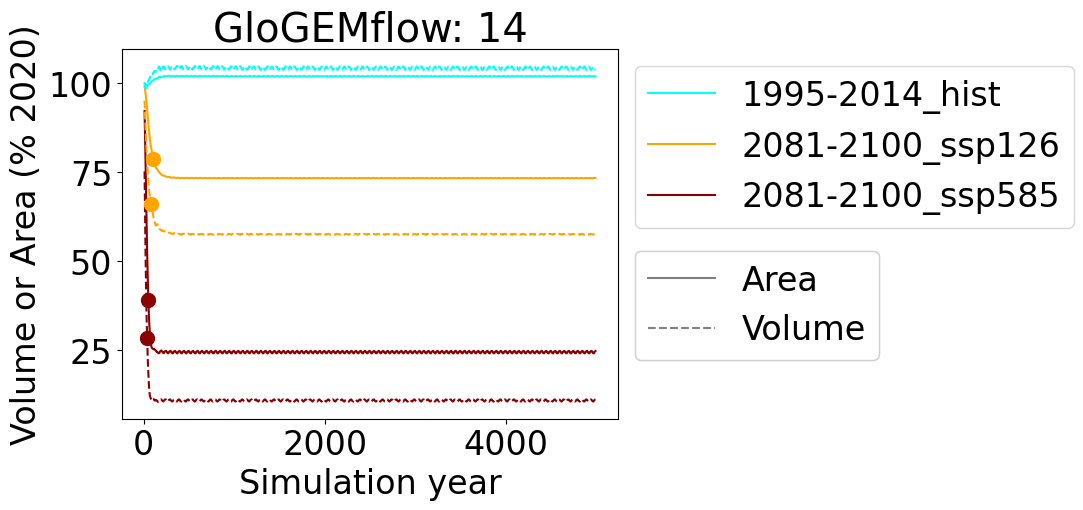

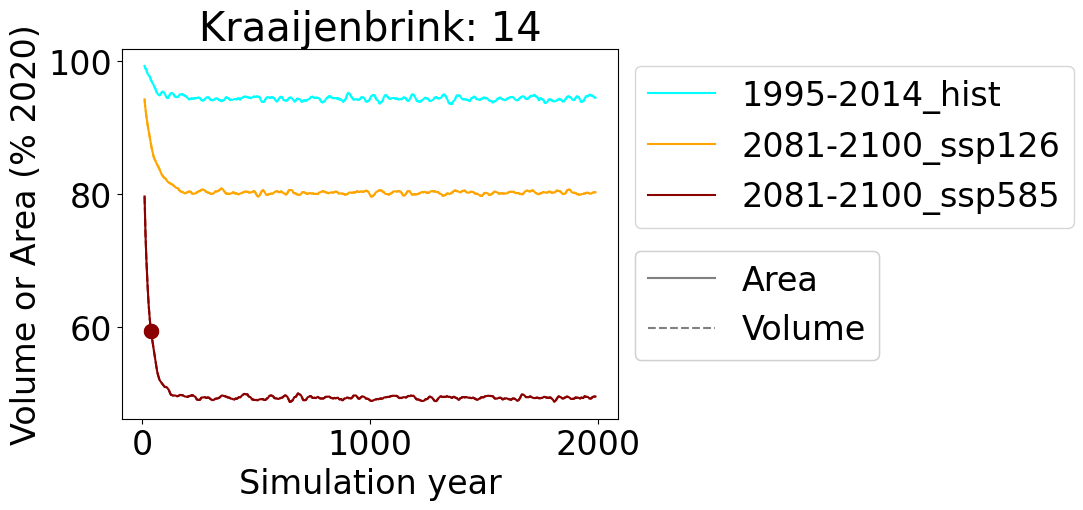

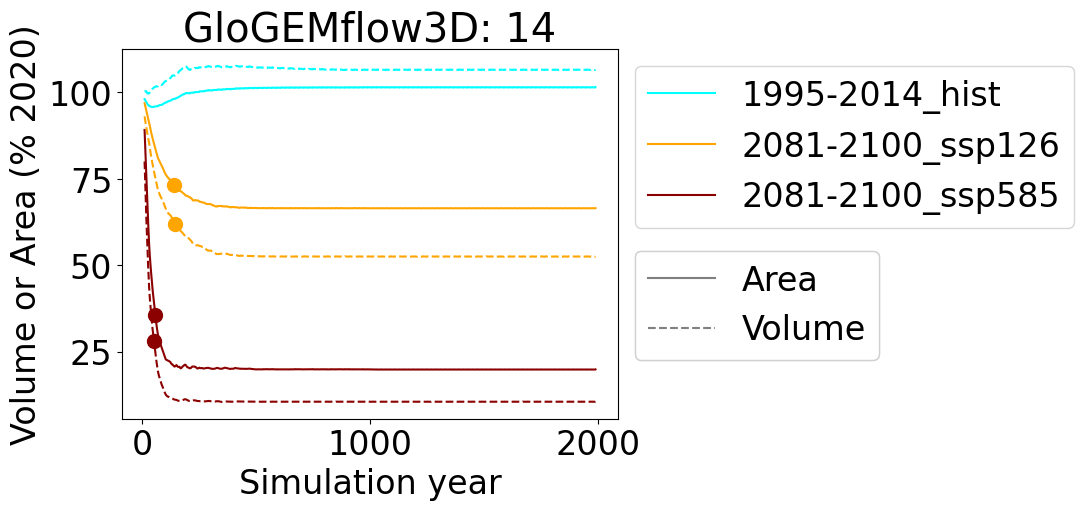

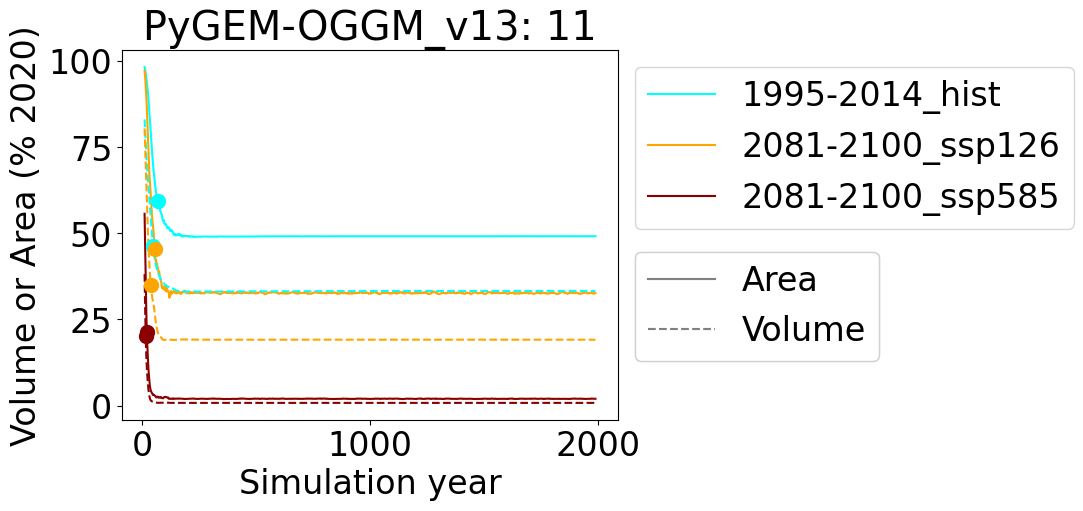

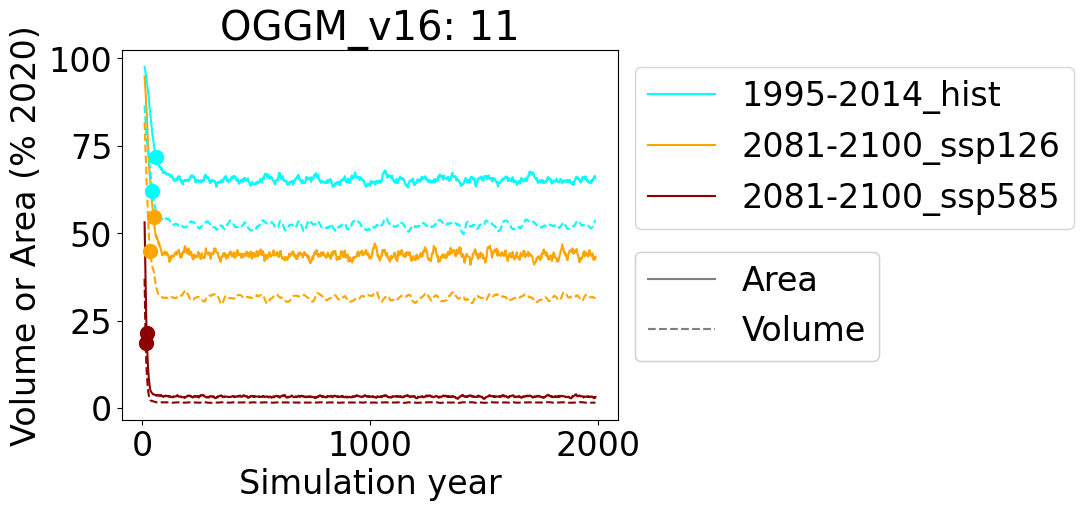

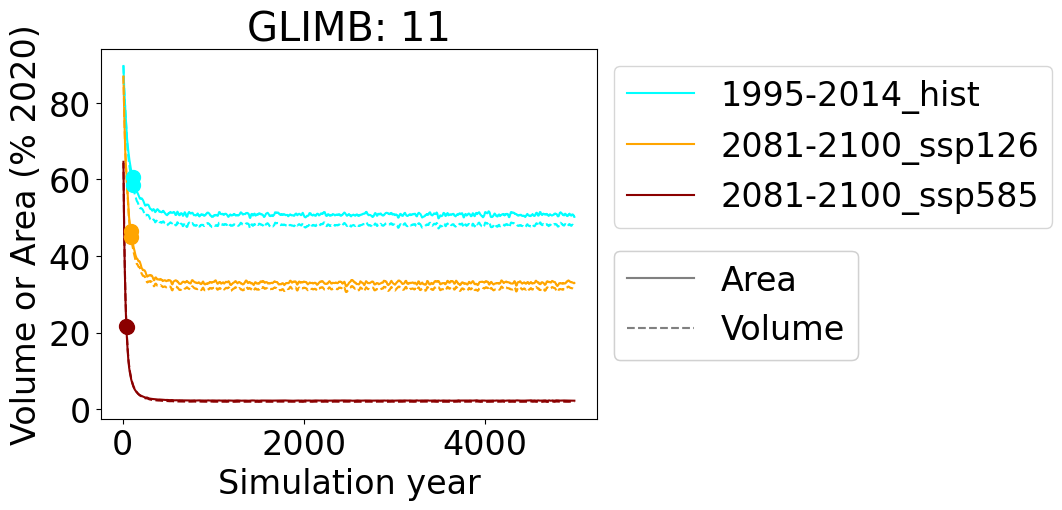

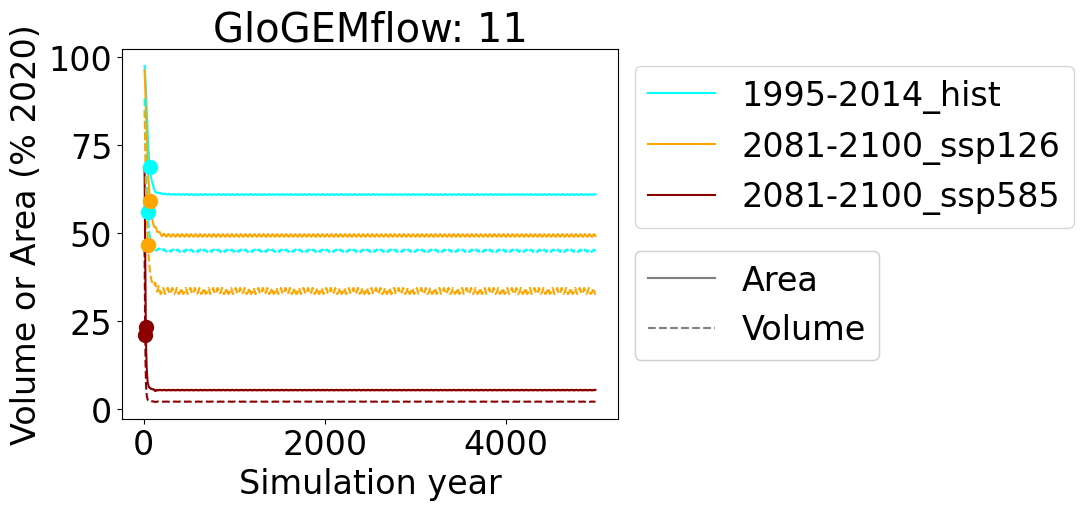

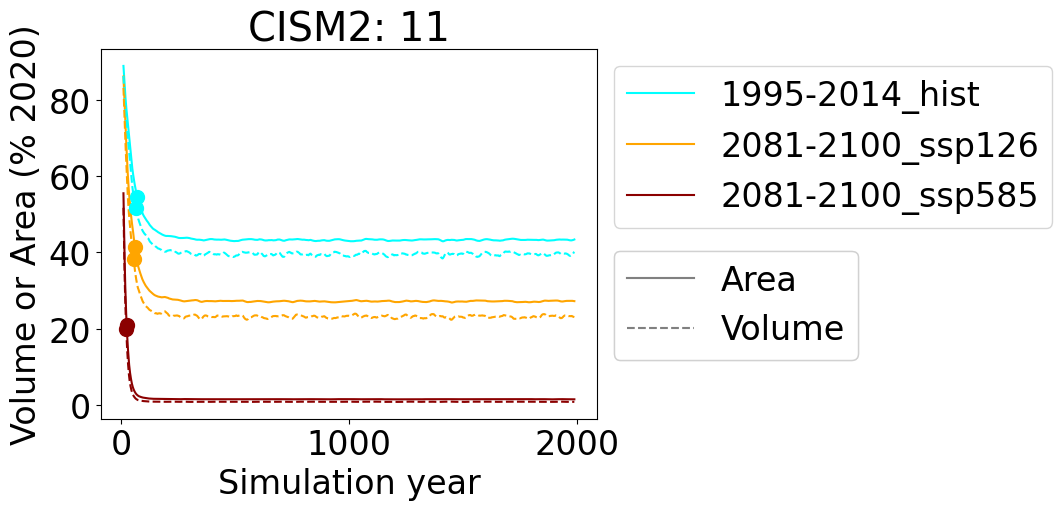

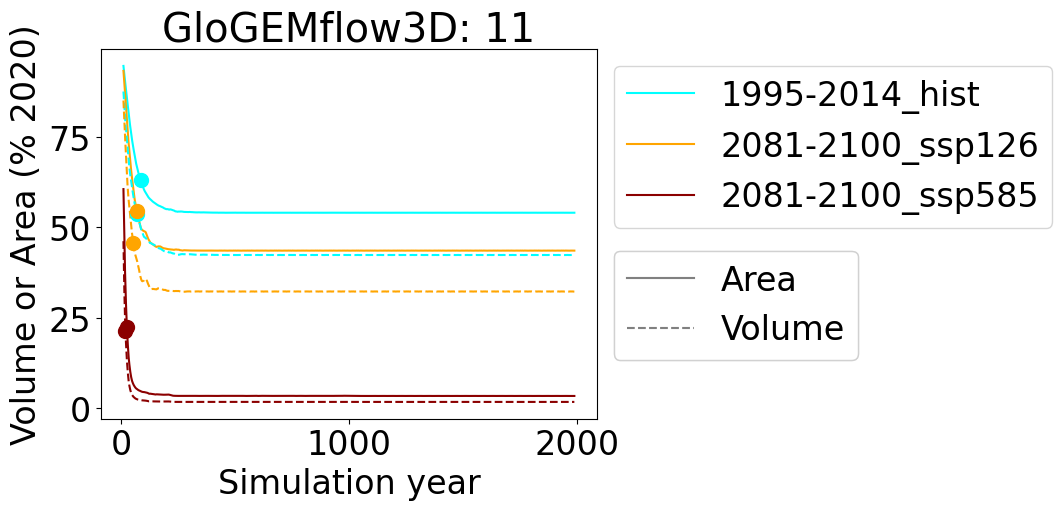

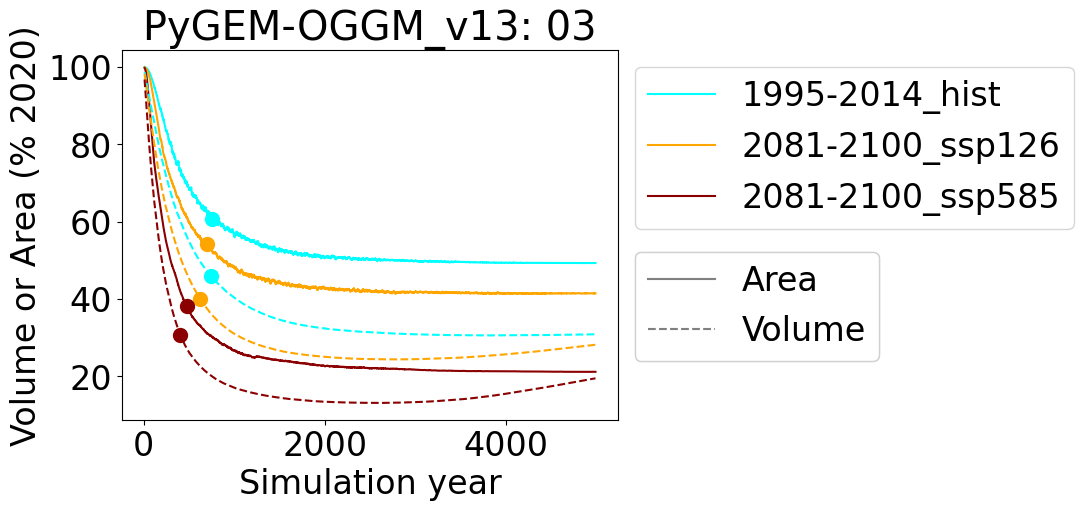

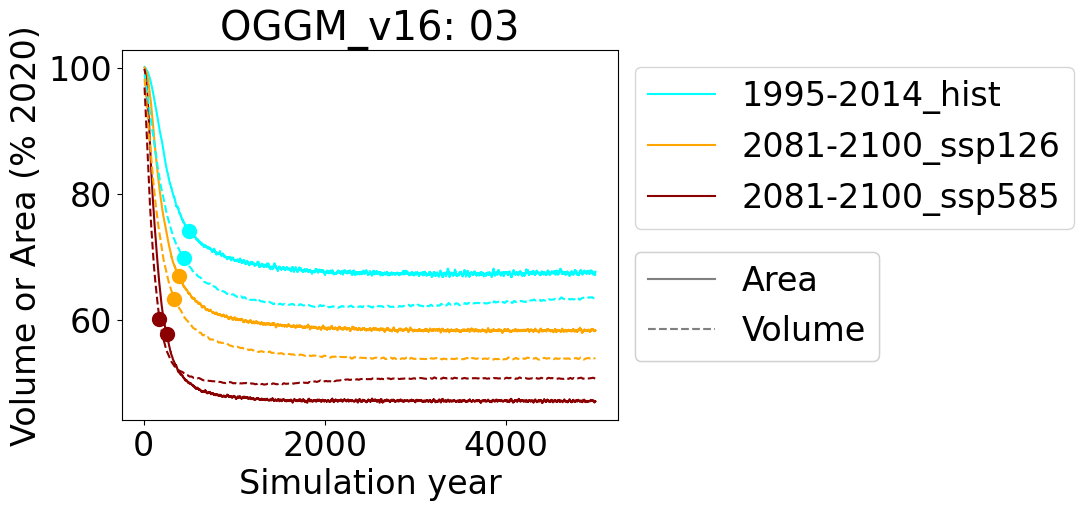

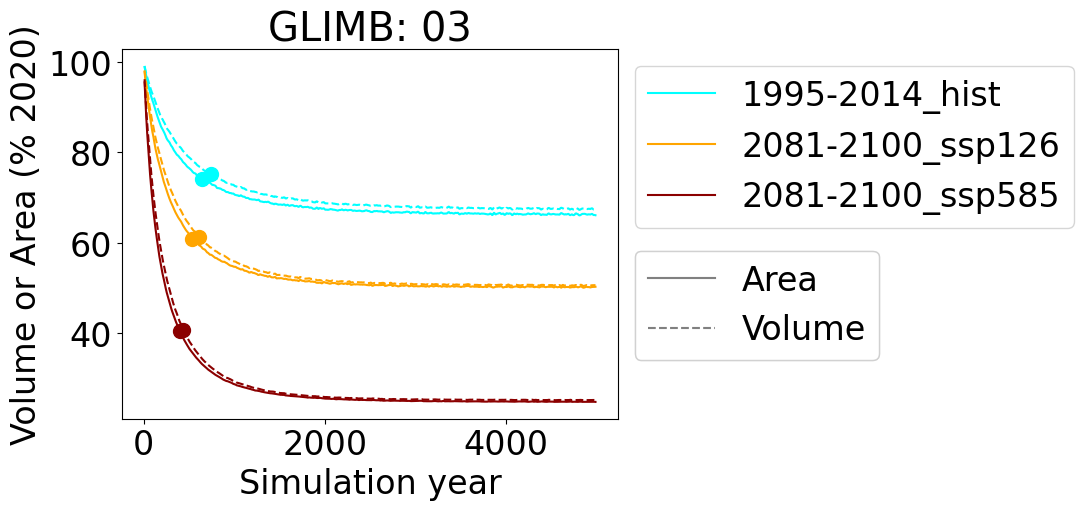

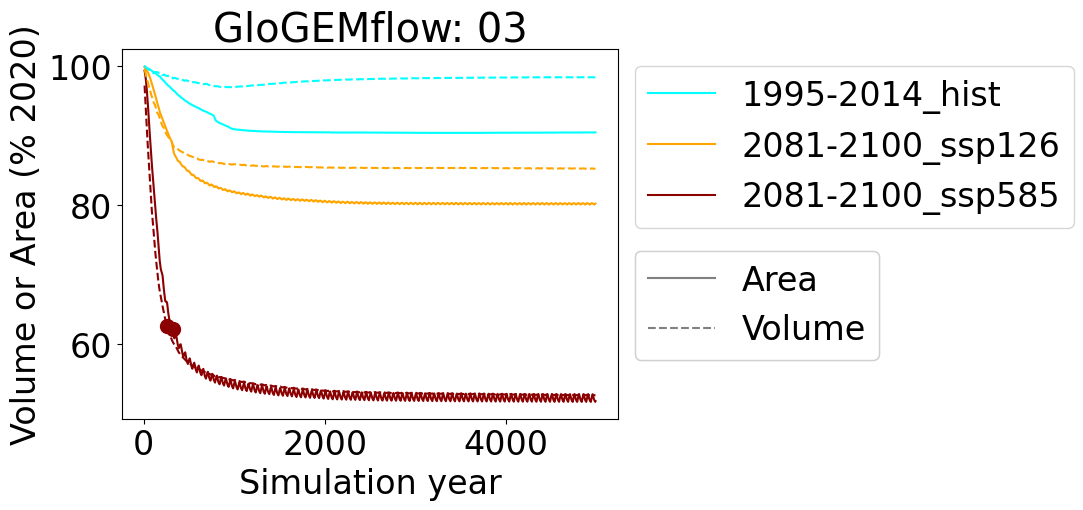

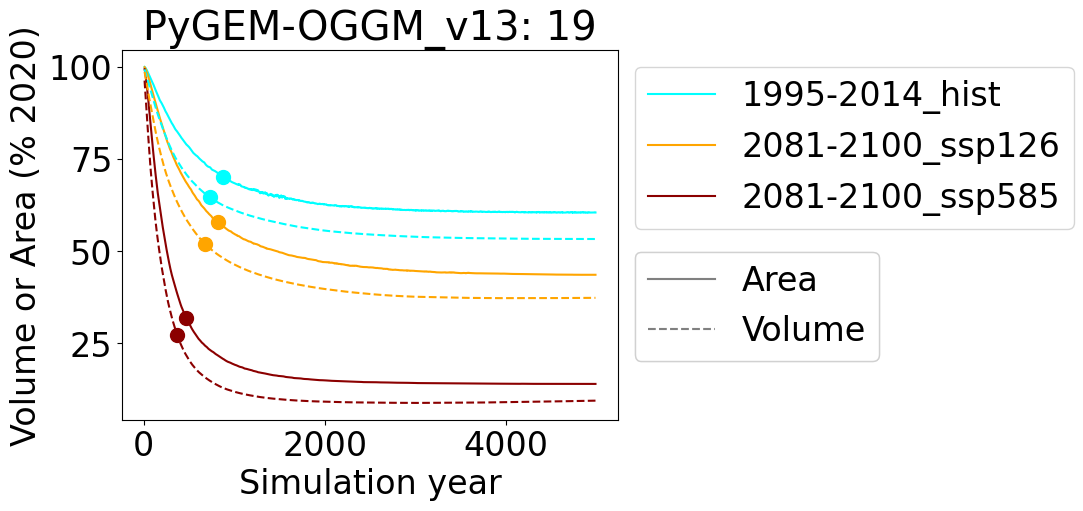

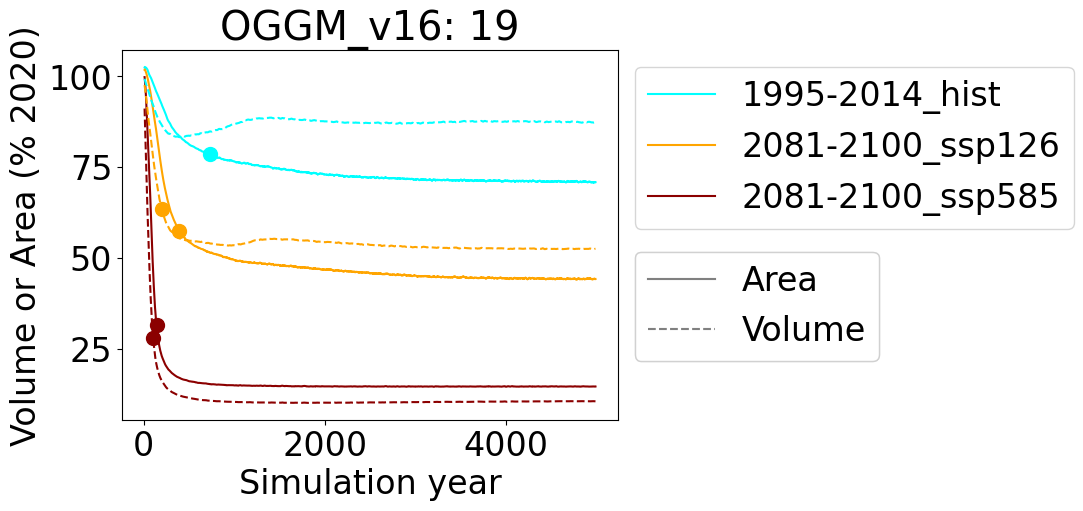

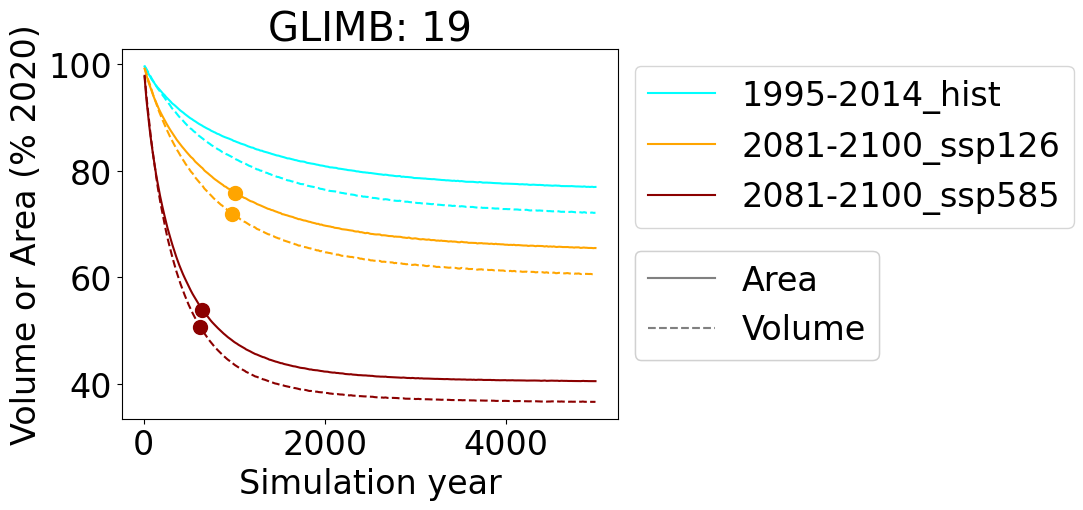

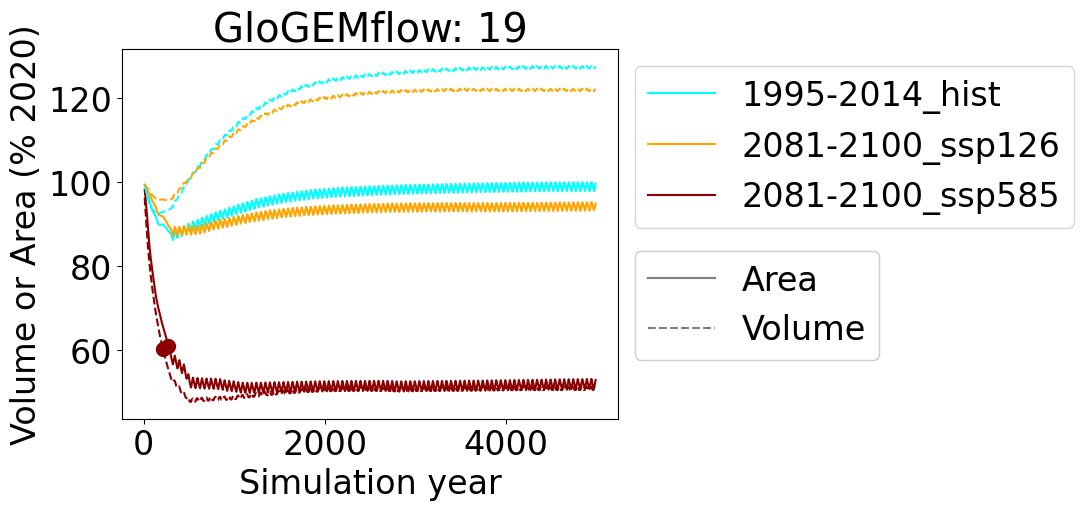

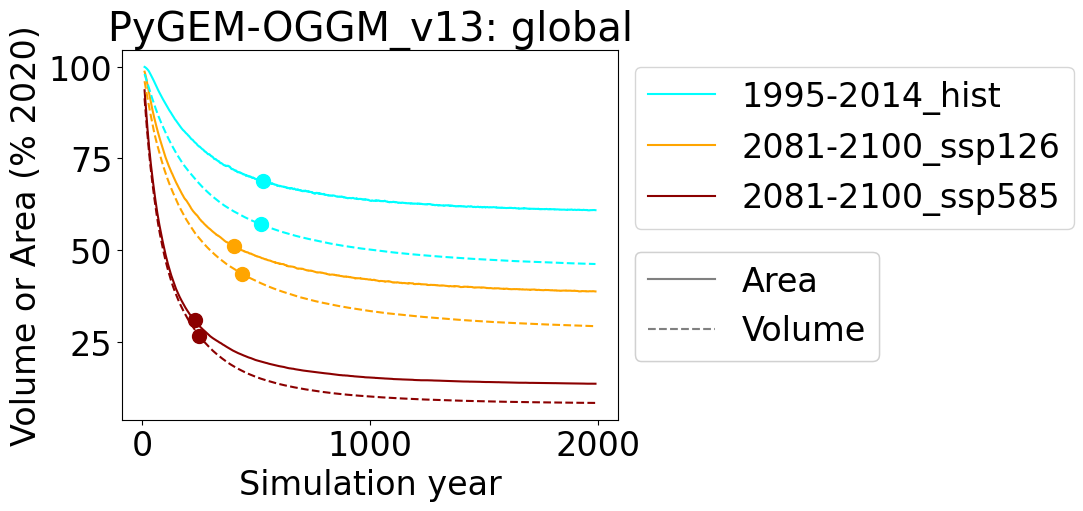

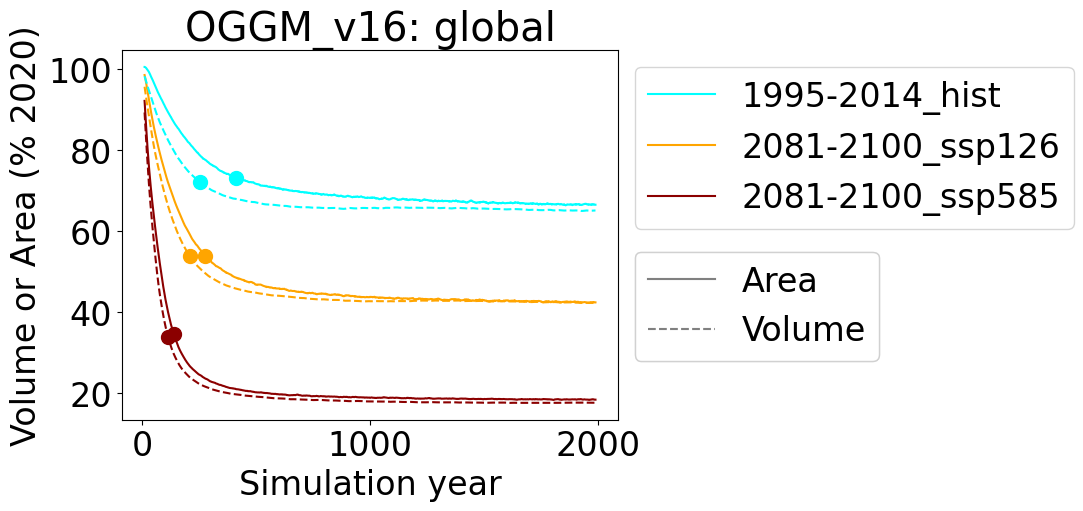

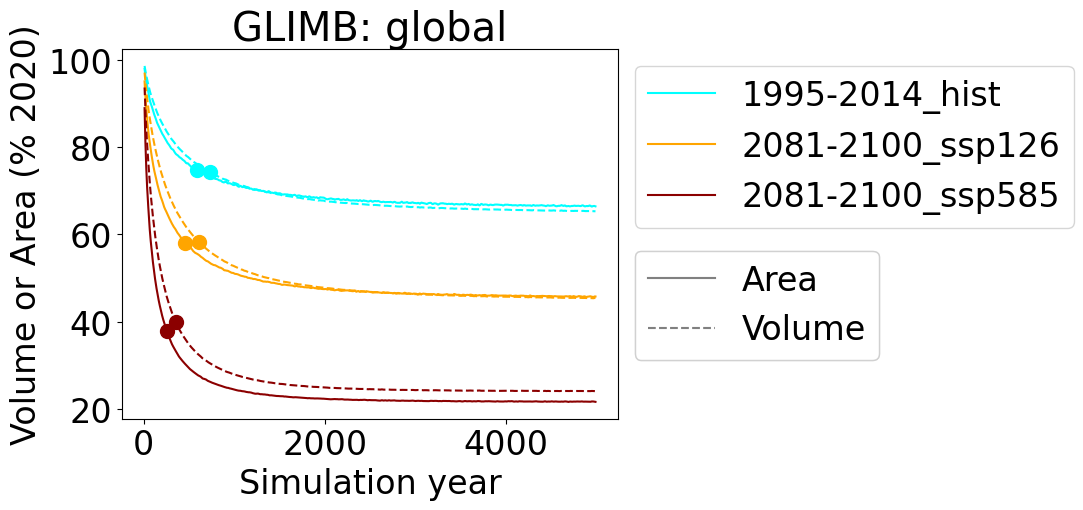

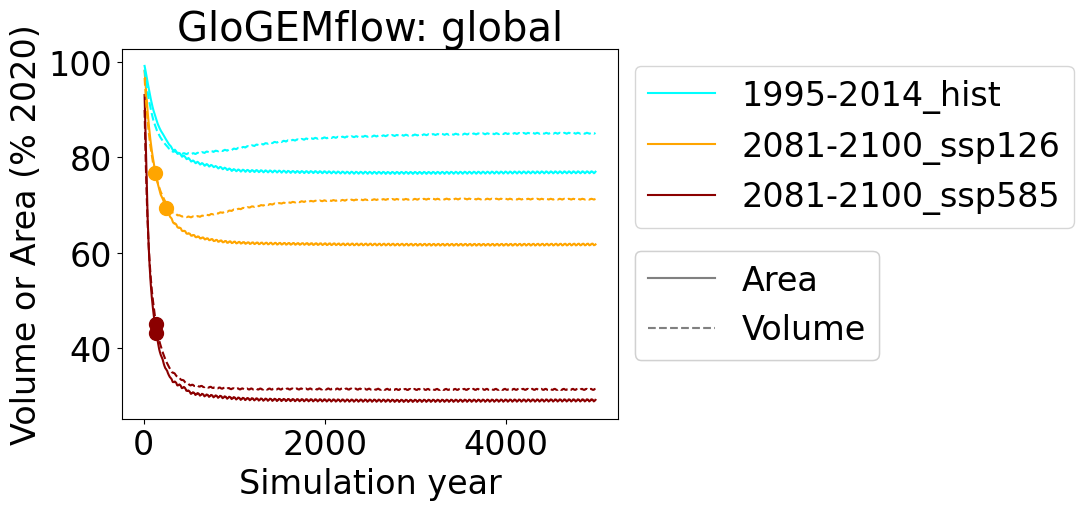

In [319]:
for reg in ['06','13','14', '11', '03', '19','global']: 
    if reg == 'global':
        ds_raw_glob = ds_raw.sum(dim='rgi_reg', min_count=19).dropna(dim='model_author', how='all')
    else:
        ds_raw_glob = ds_raw.sel(rgi_reg=reg).dropna(dim='model_author', how='all')
    v_roll = ds_raw_glob.rolling(simulation_year=roll_metric, center=True).mean()

    v_eq = ds_raw_glob.sel(simulation_year=slice(1900,1999)).mean(dim='simulation_year')
    v0 = ds_raw_glob.isel(simulation_year=0)    
    v_resp_t = v0 + (perc_change/100)*np.abs(v0-v_eq)
    
    # we take the last year where the anti-condition holds true (so it is basically the first year where the condition holds true)
    resp_t = v_roll.where(v_roll<=v_resp_t).idxmax(dim='simulation_year')
    if perc_change<0:
        # if we look at how much it shrinks it should at least shrink by min_perc_change to estimate a "response time"
        resp_t = resp_t.where(v_eq/v0 <=1-min_perc_change/100, np.NaN)
    else:
        # if we look at how much it grows it should at least grow by min_perc_change to estimate a "response time"
        resp_t = resp_t.where(v_eq/v0 >=1+min_perc_change/100, np.NaN)
    

    _perc = 100*v_roll/v0
    _perc = _perc.to_dataframe().reset_index()
        
    #for ps in ['2021-2040_ssp126','2081-2100_ssp126','2081-2100_ssp585']:
    gcm = 'gfdl-esm4'


    for model_author in ['PyGEM-OGGM_v13', 'OGGM_v16', 'GLIMB', 'GloGEMflow','Kraaijenbrink', 'CISM2', 'GO', 'GloGEMflow3D']:
        perc = _perc.loc[_perc.gcm ==gcm]
        # (perc.period_scenario == '1851-1870_hist') | 
        perc = perc.loc[(perc.period_scenario == '1995-2014_hist') | (perc.period_scenario == '2081-2100_ssp126') | (perc.period_scenario == '2081-2100_ssp585')]
        perc = perc.loc[perc.model_author==model_author]
        if len(perc)>0:
            plt.figure()
            ax=plt.gca()
            #'darkblue',
            sns.lineplot(data=perc, x= 'simulation_year', y= 'area_m2', hue='period_scenario',ax=ax, palette= sns.color_palette([ 'cyan', 'orange', 'darkred'])) #, estimator='median')
            sns.lineplot(data=perc, x= 'simulation_year', y= 'volume_m3', hue='period_scenario', ls= '--', ax=ax, palette= sns.color_palette(['cyan','orange', 'darkred'])) #, estimator='median')
            
            for c,ps in enumerate(perc.period_scenario.unique()):
                c = sns.color_palette([ 'cyan','orange', 'darkred'])[c]
                yr = resp_t.volume_m3.sel(model_author=model_author).sel(gcm=gcm).sel(period_scenario=ps)
            
                if not np.isnan(yr):
                    plt.plot(yr.values, perc.loc[(perc.simulation_year == yr.values) & (perc.period_scenario==ps)]['volume_m3'].values, 'o', ms=10, color=c)
            
                yr = resp_t.area_m2.sel(model_author=model_author).sel(gcm=gcm).sel(period_scenario=ps)
                if not np.isnan(yr): 
                    plt.plot(yr.values, perc.loc[(perc.simulation_year == yr.values) & (perc.period_scenario==ps)]['area_m2'].values, 'o', ms=10, color=c)
            han, leg = ax.get_legend_handles_labels()
            leg1 = ax.legend(han[:3],leg[:3],  loc='upper left', bbox_to_anchor=(1, 1))
            han[0].set_color('grey')
            han[3].set_color('grey')
            
            leg2 = ax.legend( [han[0], han[3]], ['Area', 'Volume'],loc='upper left', bbox_to_anchor=(1, 0.5))
            ax.add_artist(leg1)
            ax.add_artist(leg2)
            
            ax.set_title(f'{model_author}: {reg}')
            ax.set_ylabel('Volume or Area (% 2020)')
            ax.set_xlabel('Simulation year')

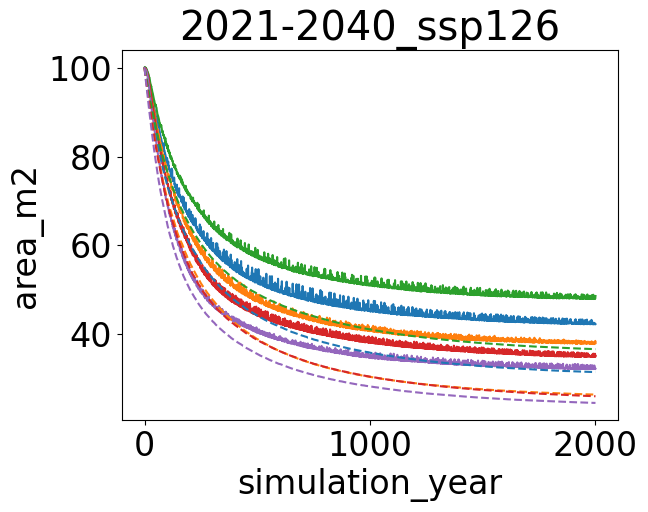

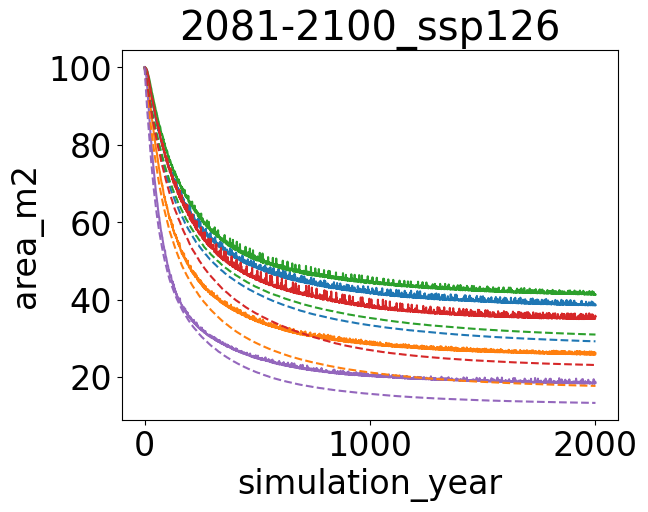

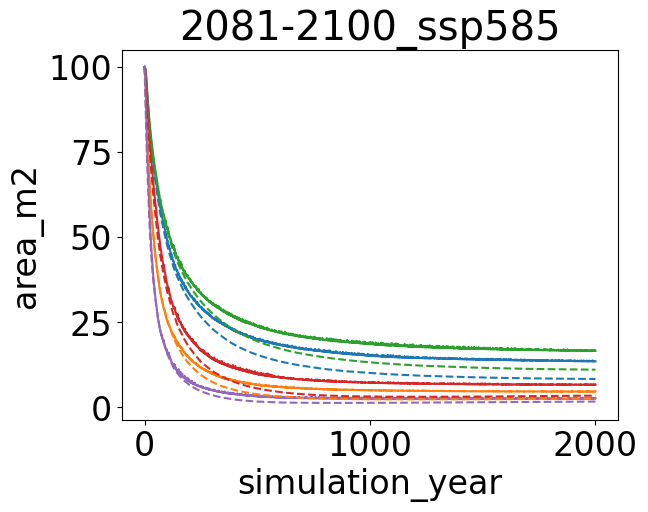

In [227]:
for ps in ['2021-2040_ssp126','2081-2100_ssp126','2081-2100_ssp585']:
    plt.figure()
    ax=plt.gca()
    perc = _perc.loc[_perc.period_scenario ==ps]
    sns.lineplot(data=perc.loc[perc.model_author=='PyGEM-OGGM_v13'], x= 'simulation_year', y= 'area_m2', hue='gcm',ax=ax) #, estimator='median')
    sns.lineplot(data=perc.loc[perc.model_author=='PyGEM-OGGM_v13'], x= 'simulation_year', y= 'volume_m3', hue='gcm', ls= '--', ax=ax) #, estimator='median')
    ax.get_legend_handles.remove()
    ax.set_title(ps)


KeyboardInterrupt



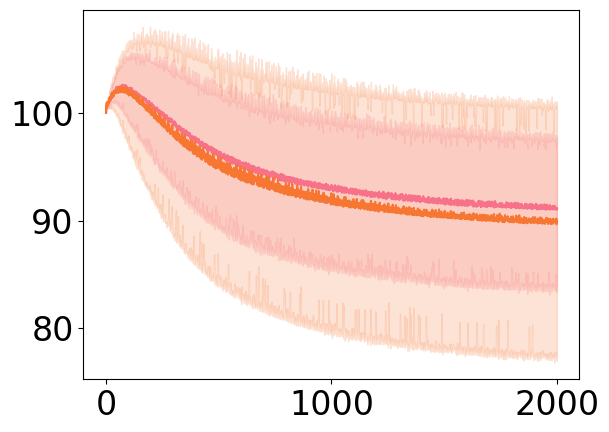

In [207]:
sns.lineplot(data=_perc.loc[_perc.model_author=='PyGEM-OGGM_v13'], x= 'simulation_year', y= 'area_m2', hue='period_scenario') #, estimator='median')

In [194]:
resp_t.sel(model_author='PyGEM-OGGM_v13')

<xarray.Dataset>
Dimensions:          (gcm: 5, period_scenario: 16)
Coordinates:
    model_author     <U14 'PyGEM-OGGM_v13'
  * gcm              (gcm) <U13 'gfdl-esm4' 'ipsl-cm6a-lr' ... 'ukesm1-0-ll'
  * period_scenario  (period_scenario) <U16 '1851-1870_hist' ... '2081-2100_s...
    simulation_year  int16 0
Data variables:
    volume_m3        (gcm, period_scenario) float32 474.0 564.0 ... 97.0 75.0
    area_m2          (gcm, period_scenario) float32 nan 603.0 nan ... 97.0 73.0

In [195]:
_raw = resp_t.area_m2.sel(model_author='PyGEM-OGGM_v13')-resp_t.volume_m3.sel(model_author='PyGEM-OGGM_v13')

<AxesSubplot:xlabel='period_scenario'>

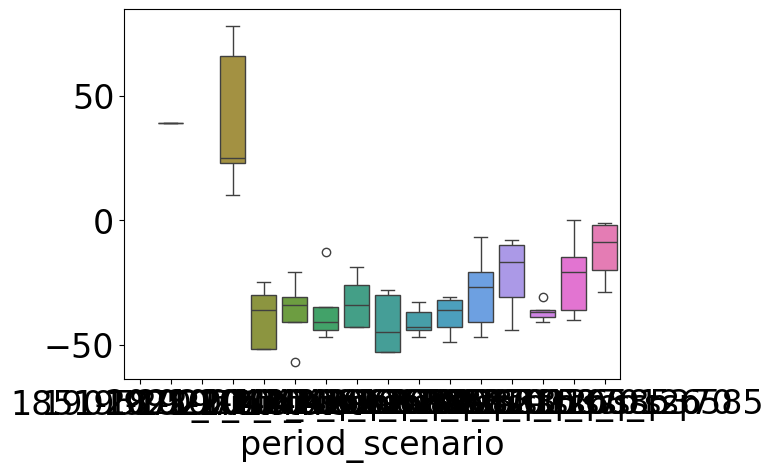

In [196]:
sns.boxplot(data=_raw.to_pandas())

<AxesSubplot:xlabel='period_scenario'>

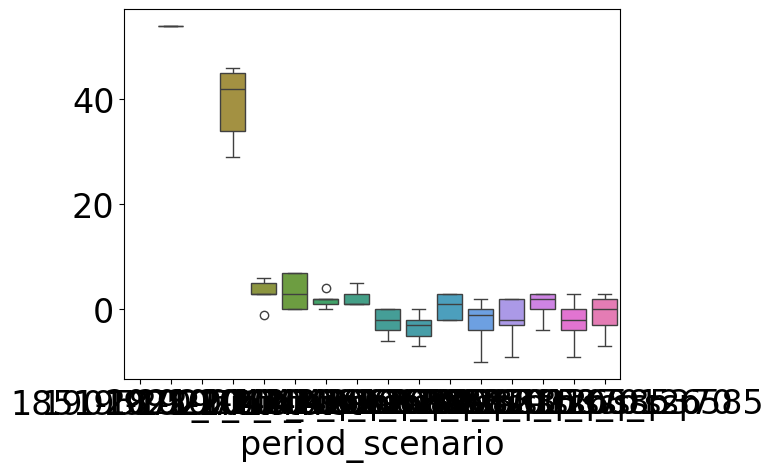

In [188]:
sns.boxplot(data=_raw.to_pandas())